In [5]:
import os
import numpy as np
from scipy import misc
import os
import numpy as np
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt
from skimage import exposure
import pylab as pl
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import SimpleITK as sitk
from scipy.stats import threshold
# 删除掉的图像顺序列表
trainDelete=[25,34,36,60,65,67,70,75,84,88,94,105,108]
testDelete =[112,113,115,121,124,126,130,133,134,136,149,151,152]

In [2]:
def getROICenters(itk_image, radius):
    itk_image = sitk.BinaryMorphologicalClosing(itk_image, radius)
    itk_image = sitk.ConnectedComponent(itk_image,fullyConnected=True)
    label_shape_analysis = sitk.LabelShapeStatisticsImageFilter()
    nodules = []
    label_shape_analysis.Execute(itk_image)
    num_labels = label_shape_analysis.GetNumberOfLabels()
    backg=0
    label_shape_analysis.SetBackgroundValue(backg)
    print(num_labels,backg)
    for l_i in range(1, num_labels + 1):
        center = label_shape_analysis.GetCentroid(l_i)
        nodules.append(center)
        print("Center:", center)
    print("found n nodules", len(nodules))
    return nodules

255.0
2 0
Center: (276.1021683604152, 426.88881039073965)
Center: (790.0058379120879, 392.8695054945055)
found n nodules 2


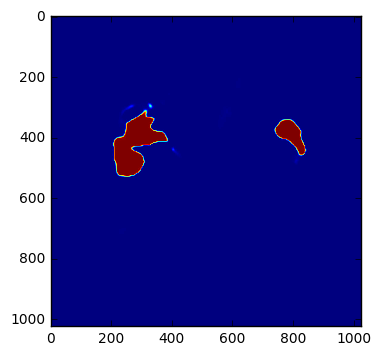

255.0
10 0
Center: (345.35927644888733, 276.43972390812803)
Center: (591.978028503563, 347.7375296912114)
Center: (317.0559796437659, 410.72773536895676)
Center: (664.1120689655172, 419.5646551724138)
Center: (311.8174686192469, 456.82217573221754)
Center: (315.8333333333333, 509.05555555555554)
Center: (297.40697674418607, 514.5813953488372)
Center: (746.0376499793132, 559.2842366570128)
Center: (307.86494252873564, 556.7844827586207)
Center: (141.18184764991895, 704.8063209076175)
found n nodules 10


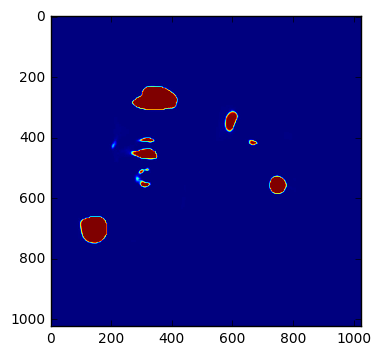

255.0
1 0
Center: (197.58682145192935, 710.8574231523871)
found n nodules 1


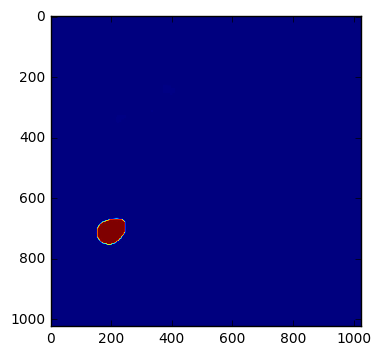

255.0
3 0
Center: (675.2717551622419, 167.71884218289085)
Center: (704.5774647887324, 319.15492957746477)
Center: (214.36742289968097, 394.4415101028004)
found n nodules 3


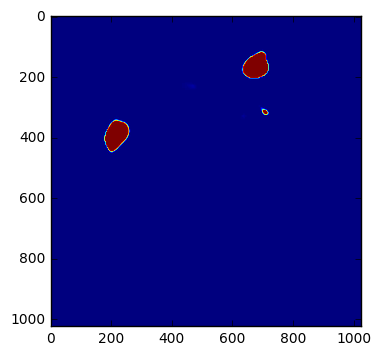

255.0
8 0
Center: (668.615120274914, 26.491558344539072)
Center: (358.74238227146816, 32.71191135734072)
Center: (689.9847494553377, 153.760348583878)
Center: (601.9707446808511, 215.50531914893617)
Center: (266.6800429603593, 294.8447568834212)
Center: (582.038961038961, 235.54545454545453)
Center: (757.7761348005502, 319.20065337001375)
Center: (302.33801404212636, 460.88064192577735)
found n nodules 8


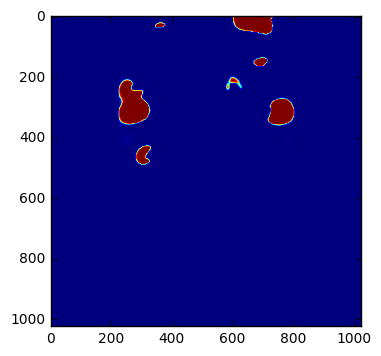

255.0
7 0
Center: (704.1484809584938, 148.36414206247326)
Center: (263.1451635254989, 376.41560421286033)
Center: (616.3891580161477, 322.63644752018456)
Center: (774.9053014553015, 393.85987525987525)
Center: (223.60638297872342, 526.313829787234)
Center: (770.4263059701492, 617.236473880597)
Center: (219.69278350515464, 763.6329896907216)
found n nodules 7


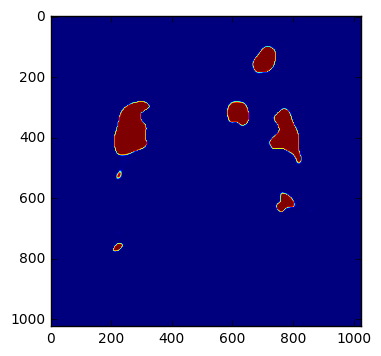

255.0
7 0
Center: (312.9270724029381, 175.66920251836305)
Center: (624.2546583850932, 280.111801242236)
Center: (278.1529023124115, 398.02453987730064)
Center: (800.8569051580699, 414.8036605657238)
Center: (717.2907488986784, 435.85022026431716)
Center: (832.7440098933374, 618.888081620034)
Center: (347.0347349177331, 694.8702010968922)
found n nodules 7


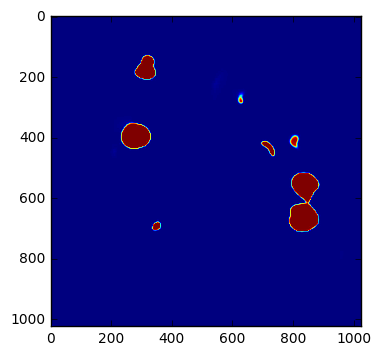

255.0
5 0
Center: (683.6842105263158, 178.3684210526316)
Center: (351.14903846153845, 232.9275641025641)
Center: (263.4135164701592, 320.575908593655)
Center: (749.9157131960336, 311.1712433257056)
Center: (275.739540302934, 619.5975002648024)
found n nodules 5


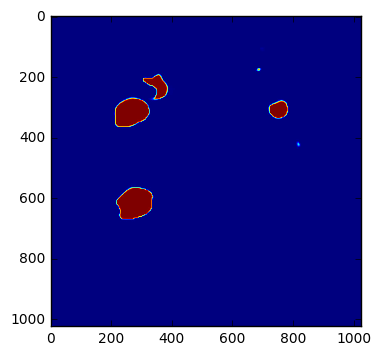

255.0
2 0
Center: (199.24864598719842, 582.4352535696701)
Center: (197.02553658154474, 744.6207112642958)
found n nodules 2


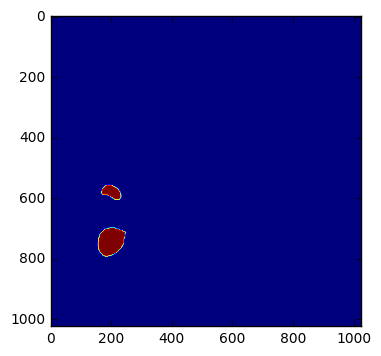

255.0
2 0
Center: (281.1982330872564, 363.2966840130703)
Center: (207.10105519480518, 406.4646915584416)
found n nodules 2


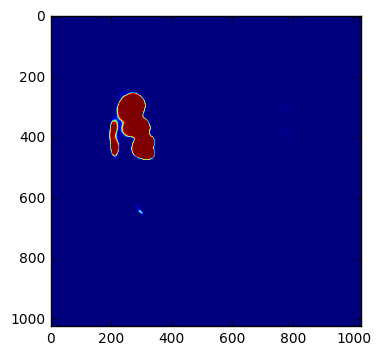

255.0
7 0
Center: (645.6214711729622, 232.7479125248509)
Center: (503.48823529411766, 240.2019607843137)
Center: (257.5364498202027, 334.71510297482837)
Center: (759.3944188090529, 330.385629531971)
Center: (297.83125864453666, 476.11479944674966)
Center: (276.2636786961583, 578.5616996507567)
Center: (133.47524752475246, 590.6633663366337)
found n nodules 7


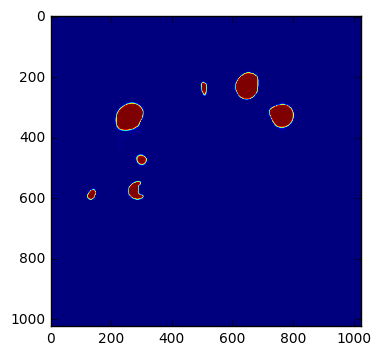

255.0
4 0
Center: (313.85745212323064, 320.93522064945876)
Center: (358.39444444444445, 514.9666666666667)
Center: (818.5677368833203, 592.087705559906)
Center: (214.28158844765343, 613.9596871239471)
found n nodules 4


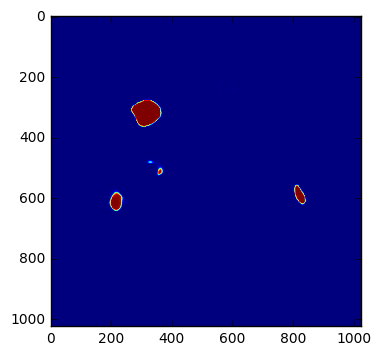

255.0
4 0
Center: (309.1745644599303, 146.51149825783972)
Center: (502.16385911179174, 227.95941807044412)
Center: (212.53880723915947, 360.6007530669258)
Center: (730.1438957891548, 408.59709179036656)
found n nodules 4


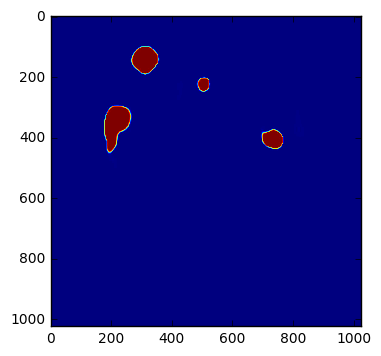

255.0
5 0
Center: (342.9351972824667, 197.16880062712306)
Center: (764.1844140392624, 334.03331350386674)
Center: (403.7409057164068, 533.9862657757981)
Center: (625.084661902144, 566.370533260033)
Center: (324.77758620689656, 707.0275862068966)
found n nodules 5


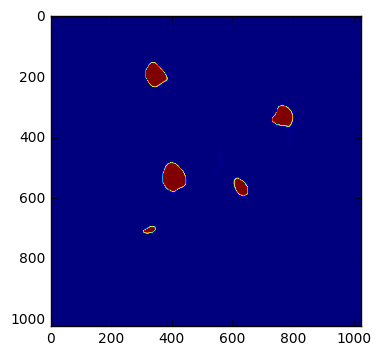

255.0
6 0
Center: (312.1477591036415, 27.599206349206348)
Center: (674.3317307692307, 31.033653846153847)
Center: (328.69241285030756, 177.99248120300751)
Center: (293.14666666666665, 386.7133333333333)
Center: (834.6758960159975, 522.0896785109983)
Center: (837.0604026845638, 736.7897091722596)
found n nodules 6


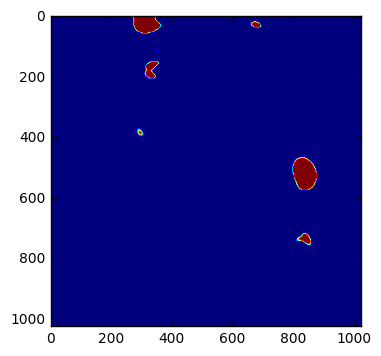

255.0
5 0
Center: (353.26954177897574, 176.10242587601078)
Center: (605.9314516129032, 224.4516129032258)
Center: (613.2672811059908, 285.1290322580645)
Center: (262.61599333610997, 439.9777870331806)
Center: (760.682328907048, 529.6901600272387)
found n nodules 5


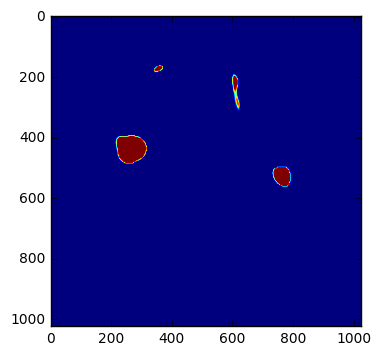

255.0
3 0
Center: (298.4575651621106, 227.71344564526382)
Center: (672.8839137645108, 226.69684908789387)
Center: (726.2502475247525, 398.2024752475248)
found n nodules 3


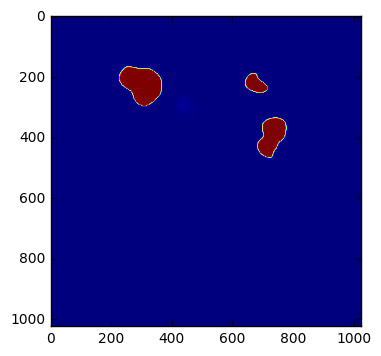

255.0
5 0
Center: (286.33498349834986, 327.97878359264496)
Center: (704.2290367290367, 325.1545391545392)
Center: (271.0492341356674, 478.8942377826404)
Center: (300.1146469049695, 538.2606800348735)
Center: (825.9087967049132, 582.8802588996764)
found n nodules 5


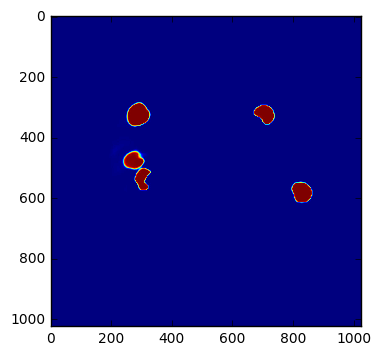

255.0
6 0
Center: (628.9968274111675, 275.13980541455163)
Center: (285.25683168316834, 313.96871287128715)
Center: (321.7525987525988, 388.8773388773389)
Center: (205.32246376811594, 411.1195652173913)
Center: (298.4539653600729, 436.5332725615315)
Center: (250.6086956521739, 417.55900621118013)
found n nodules 6


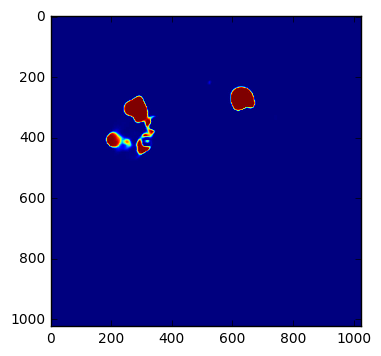

255.0
6 0
Center: (360.07485525227463, 184.50868486352357)
Center: (313.9086805555556, 313.98090277777777)
Center: (665.894221351616, 324.85210577864837)
Center: (284.2918646368661, 483.2590904683409)
Center: (731.3357664233577, 482.82481751824815)
Center: (274.858940397351, 576.682119205298)
found n nodules 6


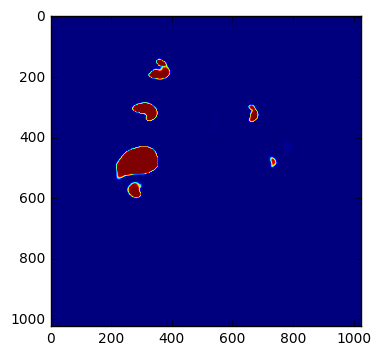

255.0
3 0
Center: (776.0248447204968, 318.8198757763975)
Center: (186.59178321678323, 587.2791375291375)
Center: (273.4288594470046, 685.3608870967741)
found n nodules 3


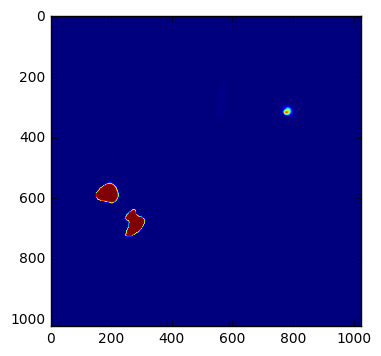

255.0
3 0
Center: (309.36221672062464, 169.4321081698724)
Center: (232.89349642004774, 305.3758949880668)
Center: (276.4248136165424, 525.6377127584751)
found n nodules 3


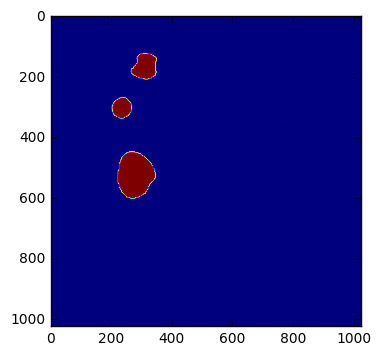

255.0
5 0
Center: (624.3738601823708, 273.47537993920974)
Center: (280.18918918918916, 292.7837837837838)
Center: (233.3905167820991, 395.77464038359085)
Center: (446.3267139479905, 522.6108747044917)
Center: (890.0384319754036, 605.8700999231361)
found n nodules 5


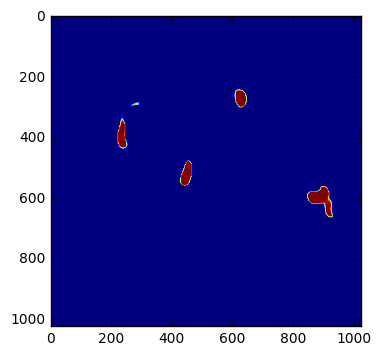

255.0
4 0
Center: (716.5714285714286, 201.85714285714286)
Center: (294.97772828507794, 436.83450402604075)
Center: (665.8995815899582, 408.74058577405856)
Center: (318.21651270207855, 648.6550230946882)
found n nodules 4


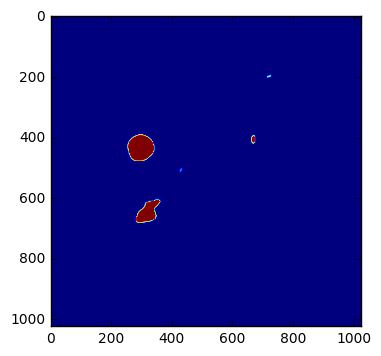

255.0
3 0
Center: (690.6674271909811, 432.7607032613072)
Center: (289.2488794180322, 532.3324270703212)
Center: (343.804469273743, 707.2122905027933)
found n nodules 3


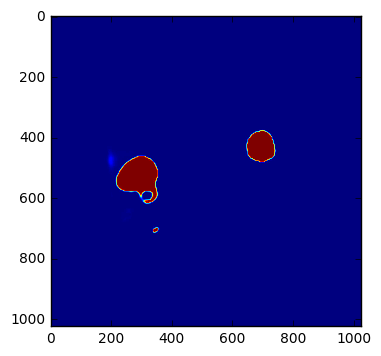

255.0
5 0
Center: (601.4193254329991, 272.69279854147675)
Center: (252.3855410785378, 348.17173362287366)
Center: (759.4096323148627, 330.7102537545313)
Center: (240.91775117126497, 508.7204580947423)
Center: (237.62007684918348, 705.4291546589817)
found n nodules 5


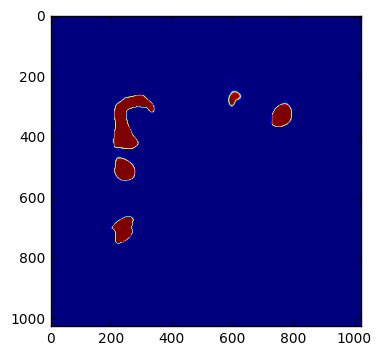

255.0
2 0
Center: (267.1869939432579, 349.9324195090851)
Center: (291.3236261155472, 559.3572099577266)
found n nodules 2


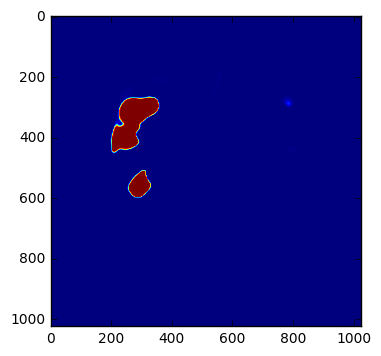

255.0
10 0
Center: (629.0271115745568, 291.47966631908236)
Center: (289.126309005961, 321.30626711777023)
Center: (826.9379412247579, 411.62108028238384)
Center: (204.92675159235668, 381.38853503184714)
Center: (245.71817192600653, 432.4975516866159)
Center: (433.26062992125986, 498.19763779527557)
Center: (669.6, 525.5076923076923)
Center: (835.8114231014678, 629.3456285896618)
Center: (277.8534931042279, 598.0287135428442)
Center: (165.43585237258347, 642.9666080843585)
found n nodules 10


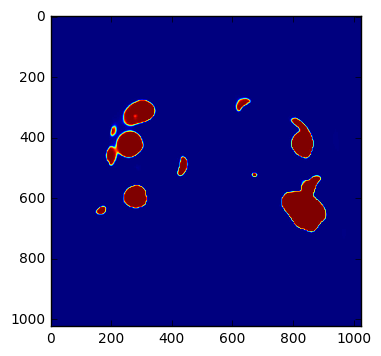

255.0
4 0
Center: (535.1058870011854, 231.35677597787435)
Center: (809.1068165846802, 312.74490513000706)
Center: (210.76136363636363, 430.27272727272725)
Center: (810.7831325301205, 447.69477911646584)
found n nodules 4


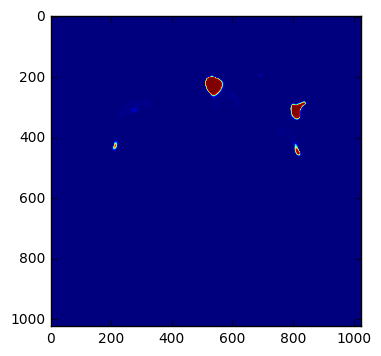

255.0
6 0
Center: (429.40571692023974, 243.62286768095896)
Center: (240.47650840751731, 431.31058358061324)
Center: (444.10460251046027, 405.07531380753136)
Center: (442.50868055555554, 513.2098765432099)
Center: (267.86651927594306, 587.3149094928838)
Center: (772.961820083682, 685.1574267782427)
found n nodules 6


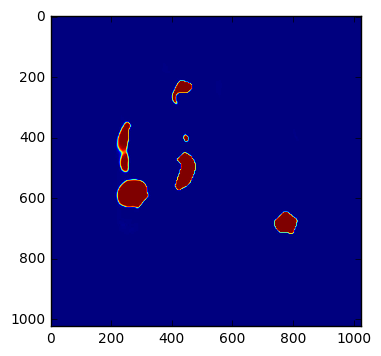

255.0
4 0
Center: (730.3728581220014, 329.89581905414667)
Center: (276.5, 396.0)
Center: (293.3658536585366, 396.780487804878)
Center: (808.3324175824176, 448.38461538461536)
found n nodules 4


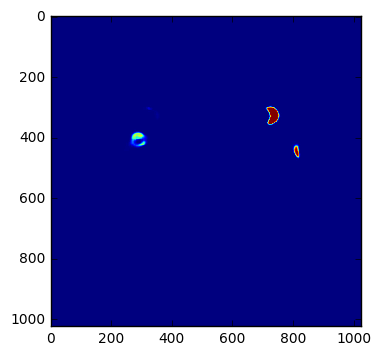

255.0
6 0
Center: (538.9059139784946, 222.88172043010752)
Center: (286.46057457212714, 311.53504482477587)
Center: (768.8996692392503, 306.36714443219404)
Center: (206.7395498392283, 388.13987138263667)
Center: (210.61437125748503, 475.24910179640716)
Center: (253.2514673275075, 638.3325942350333)
found n nodules 6


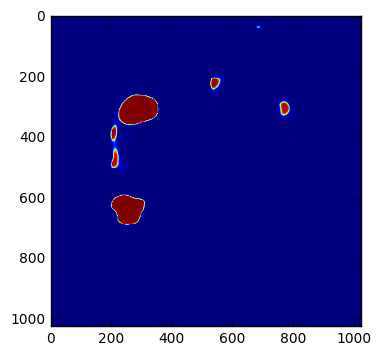

255.0
3 0
Center: (311.5403889304413, 289.6458489154824)
Center: (604.2795774647888, 369.5584507042254)
Center: (307.56459400146304, 813.0942209217264)
found n nodules 3


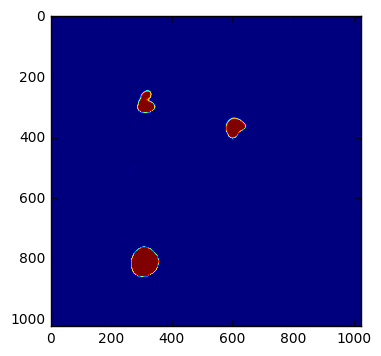

255.0
4 0
Center: (700.9277638190955, 318.5609296482412)
Center: (321.43090760425184, 428.60288907059146)
Center: (441.1025641025641, 468.94871794871796)
Center: (312.27358490566036, 522.8085783238263)
found n nodules 4


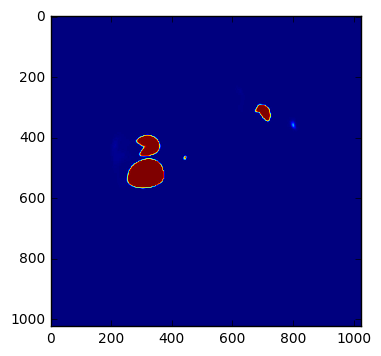

255.0
4 0
Center: (253.97804200659607, 365.19987849331716)
Center: (750.6132887189292, 321.5733747609943)
Center: (822.1363586176439, 565.800485812079)
Center: (278.09353146853147, 582.2185314685315)
found n nodules 4


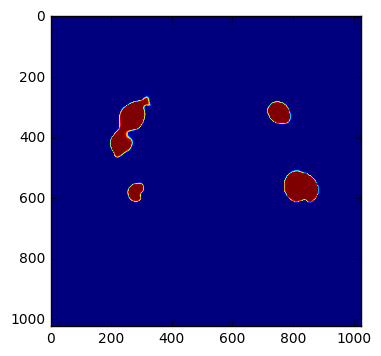

255.0
2 0
Center: (647.8548668703623, 226.43354430379748)
Center: (319.3921248835042, 449.29566635601117)
found n nodules 2


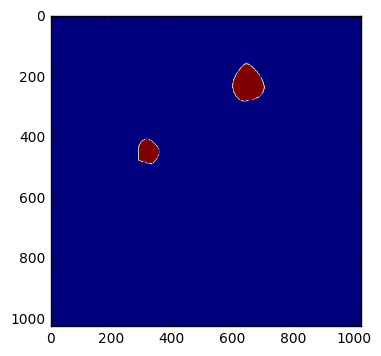

255.0
3 0
Center: (698.0666565671868, 187.14149371307377)
Center: (761.6394643759475, 346.04320363820113)
Center: (286.1162695488414, 413.6059936133628)
found n nodules 3


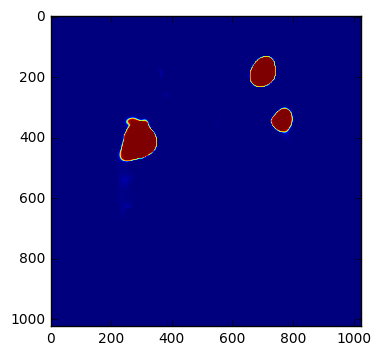

255.0
3 0
Center: (599.1282660332541, 248.61757719714964)
Center: (716.0355632657487, 350.12544725143664)
Center: (320.9124040920716, 539.3438299232737)
found n nodules 3


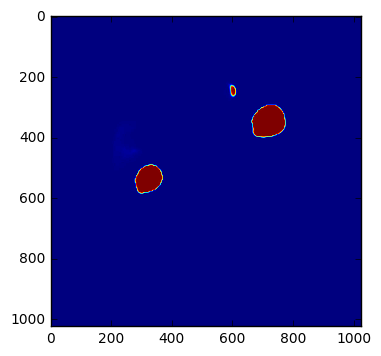

255.0
1 0
Center: (320.47849183726356, 270.8898678414097)
found n nodules 1


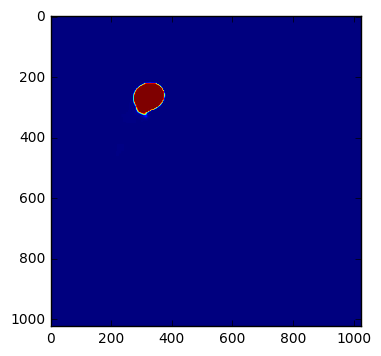

255.0
3 0
Center: (659.0360320284698, 195.90213523131672)
Center: (299.91078448128525, 283.697145787045)
Center: (224.28404034411153, 424.9649955502818)
found n nodules 3


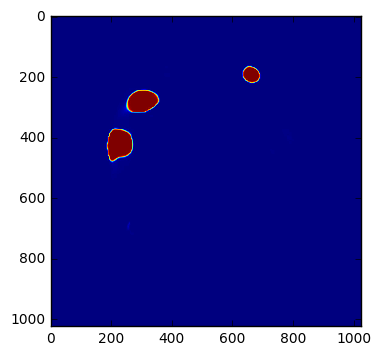

255.0
10 0
Center: (318.7653624985906, 167.62273086029992)
Center: (654.1408558329089, 213.76668364747835)
Center: (265.43156297420336, 306.30773899848253)
Center: (755.636803185438, 314.68572241183165)
Center: (202.0, 440.5)
Center: (260.445306122449, 472.37020408163266)
Center: (271.5534331440372, 675.8590604026846)
Center: (119.03602058319039, 667.3447684391081)
Center: (174.1578947368421, 728.147472642001)
Center: (808.2841068917019, 765.7721518987341)
found n nodules 10


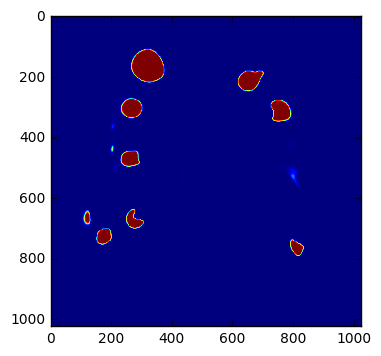

255.0
8 0
Center: (375.0485436893204, 205.6712682038835)
Center: (343.1734693877551, 294.2312925170068)
Center: (239.57507082152975, 295.1586402266289)
Center: (796.4946194861851, 467.18458555501695)
Center: (636.6813186813187, 417.45054945054943)
Center: (430.15157480314963, 440.40157480314963)
Center: (232.70886075949366, 564.9676184869002)
Center: (301.0193982581156, 624.6985352335709)
found n nodules 8


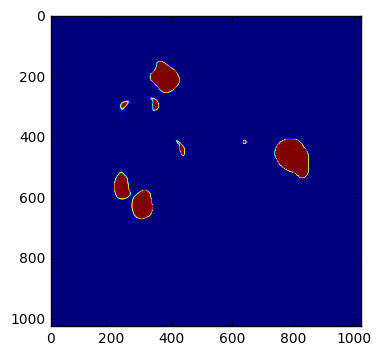

255.0
4 0
Center: (685.2607174103238, 166.24146981627297)
Center: (306.4668549905838, 300.2828625235405)
Center: (239.85766727849156, 422.3524111463374)
Center: (295.40457373465614, 589.3734656129141)
found n nodules 4


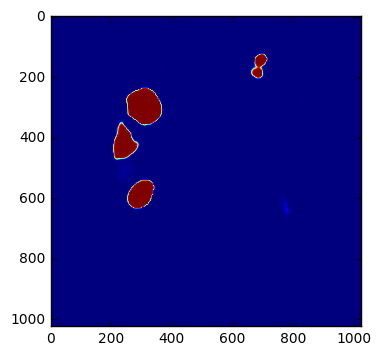

255.0
2 0
Center: (320.11075601717766, 194.8189353840008)
Center: (125.86603773584906, 578.277358490566)
found n nodules 2


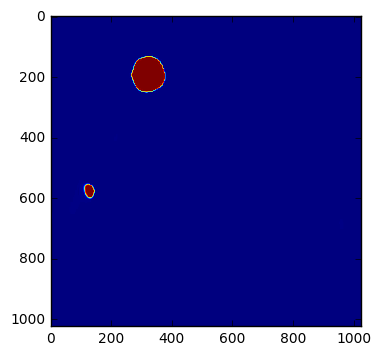

255.0
8 0
Center: (371.4868603042877, 192.20516366989395)
Center: (627.5344138543517, 280.22135879218473)
Center: (826.997512143111, 375.31891955929393)
Center: (237.32288192128087, 316.8132088058706)
Center: (307.3861649562904, 355.2462941847206)
Center: (241.6830530401035, 524.9430789133247)
Center: (135.34910769777147, 566.7811417917073)
Center: (846.9433497536946, 620.14039408867)
found n nodules 8


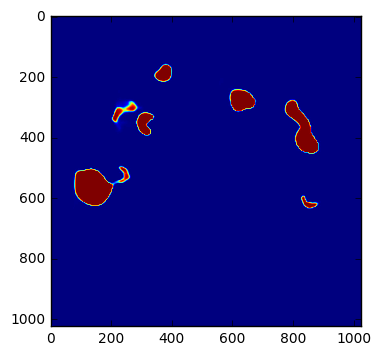

255.0
5 0
Center: (535.4155844155844, 227.12987012987014)
Center: (621.1458140253321, 268.6308310163732)
Center: (331.38378378378377, 306.02252252252254)
Center: (254.3006325721025, 487.15503377291736)
Center: (269.1620868180008, 568.1107128634011)
found n nodules 5


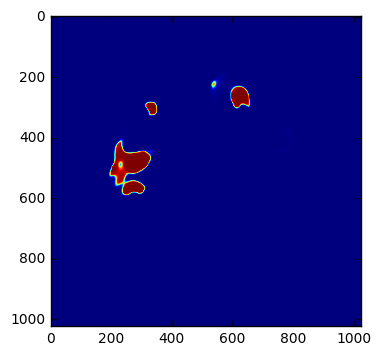

255.0
7 0
Center: (678.3969653475497, 172.474266967398)
Center: (346.6856, 230.3336)
Center: (737.456090651558, 309.73748819641173)
Center: (283.5600329916343, 357.4536349711323)
Center: (211.2546362339515, 508.2546362339515)
Center: (807.502688172043, 588.7069892473119)
Center: (126.7450495049505, 699.009900990099)
found n nodules 7


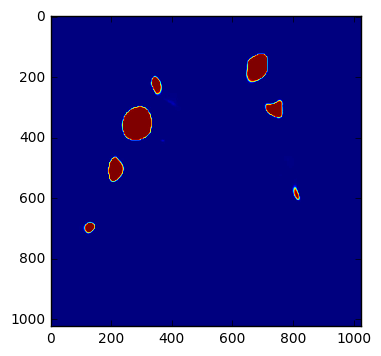

255.0
3 0
Center: (307.4600760456274, 176.0380228136882)
Center: (493.0, 221.25)
Center: (286.8692744223753, 515.0069922983381)
found n nodules 3


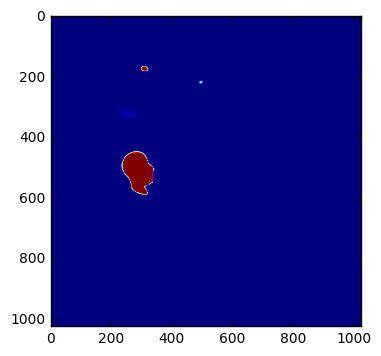

255.0
4 0
Center: (327.20724073760783, 183.6687531720521)
Center: (706.1982049364249, 193.77281226626778)
Center: (319.54965357967666, 333.08863961288904)
Center: (821.8267367838362, 541.8331026847495)
found n nodules 4


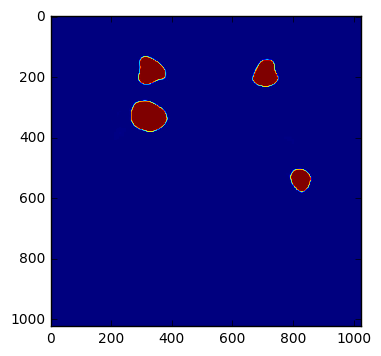

255.0
8 0
Center: (322.31538080290767, 29.002147695357674)
Center: (695.4107435309531, 27.122174909924663)
Center: (330.10710073130457, 144.50294880868128)
Center: (605.544, 217.524)
Center: (769.1022494887526, 227.61349693251535)
Center: (764.9042395493626, 344.0005929439668)
Center: (276.37355137780065, 372.95158382693796)
Center: (686.9611307420495, 347.9257950530035)
found n nodules 8


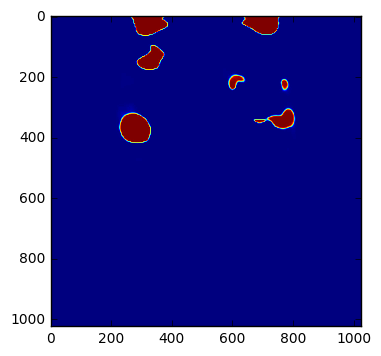

255.0
6 0
Center: (322.02620802620805, 137.64496314496316)
Center: (331.01488833746896, 369.17369727047145)
Center: (837.099173553719, 476.18698347107437)
Center: (196.18333333333334, 570.0733333333334)
Center: (252.30308529945555, 660.6678765880217)
Center: (794.6007312271491, 744.8465360457486)
found n nodules 6


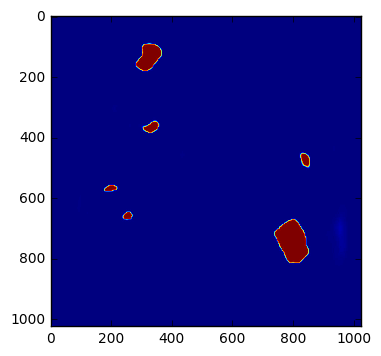

255.0
5 0
Center: (335.9314089739926, 169.3866819091169)
Center: (703.5494391971665, 180.48243801652893)
Center: (522.3015037593985, 232.74812030075188)
Center: (284.53742550655545, 318.3595947556615)
Center: (199.08893337146125, 443.6120960823563)
found n nodules 5


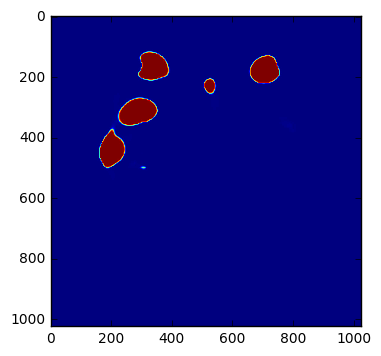

255.0
2 0
Center: (252.83235952867855, 389.37734930372966)
Center: (310.86854826134413, 542.7399033213785)
found n nodules 2


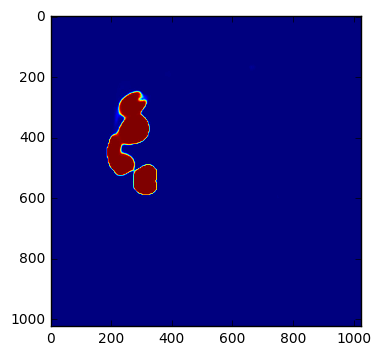

255.0
7 0
Center: (328.3979702790866, 169.72635012685757)
Center: (677.292899408284, 179.05621301775147)
Center: (751.4770380568394, 332.43347428459043)
Center: (658.0, 301.5)
Center: (408.62409535972756, 358.4074074074074)
Center: (628.3005952380952, 366.0367063492063)
Center: (205.93346278317154, 669.2188996763754)
found n nodules 7


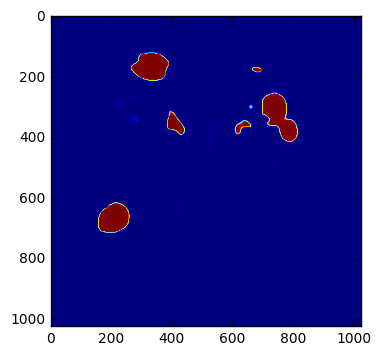

255.0
6 0
Center: (358.80804020100504, 243.05306532663317)
Center: (492.7737169517885, 304.13297045101086)
Center: (758.7885714285715, 350.4190476190476)
Center: (203.37586899428396, 478.74880271898655)
Center: (633.219512195122, 428.19660014781965)
Center: (812.3788903924221, 556.4100135317997)
found n nodules 6


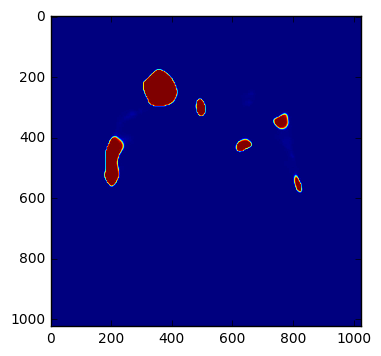

255.0
6 0
Center: (594.7493403693932, 267.3377308707124)
Center: (728.4650096950467, 296.21311475409834)
Center: (292.67783505154637, 321.703853706431)
Center: (240.1304347826087, 402.5)
Center: (282.3753776435045, 579.6394044022443)
Center: (799.1510184968391, 637.4724888784827)
found n nodules 6


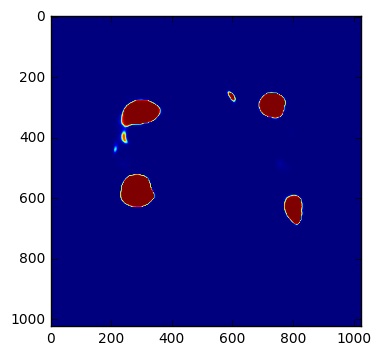

255.0
5 0
Center: (323.25219298245617, 142.82894736842104)
Center: (254.74726060028584, 318.9767746545974)
Center: (739.2564543889845, 479.13253012048193)
Center: (271.57879014189695, 563.9085884988798)
Center: (131.0, 585.3478260869565)
found n nodules 5


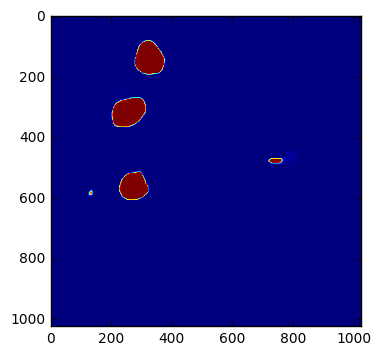

255.0
6 0
Center: (258.2343888396811, 339.112378210806)
Center: (606.5024015369837, 353.50816522574445)
Center: (232.95774647887325, 430.8732394366197)
Center: (815.1757575757575, 617.6590111642744)
Center: (289.5634699562276, 733.5817747711898)
Center: (7.694940476190476, 814.3831845238095)
found n nodules 6


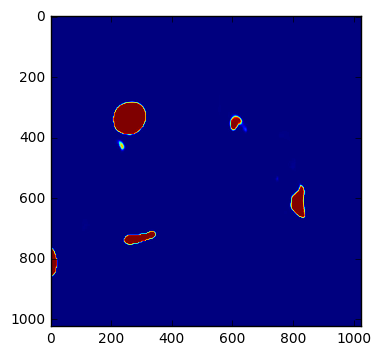

255.0
7 0
Center: (337.38221362332376, 218.58969911268264)
Center: (677.2022258414767, 207.45385450597178)
Center: (778.9659090909091, 310.54671717171715)
Center: (223.69150211343134, 385.28414611065546)
Center: (709.198535820115, 463.5232700017431)
Center: (207.08058326937837, 587.8679969301612)
Center: (260.6879549966909, 681.4232296492389)
found n nodules 7


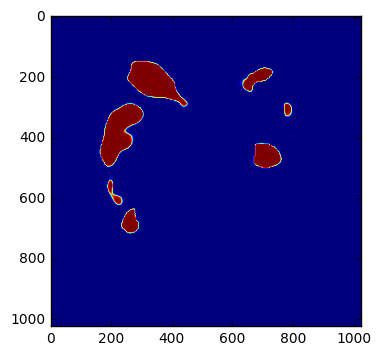

255.0
6 0
Center: (741.0193842645382, 335.0739534126079)
Center: (206.59897292250233, 421.32586367880486)
Center: (744.8701672361086, 526.5036863873404)
Center: (239.39808043875686, 732.43281535649)
Center: (1.3026315789473684, 822.7105263157895)
Center: (801.0021459227468, 835.3090128755365)
found n nodules 6


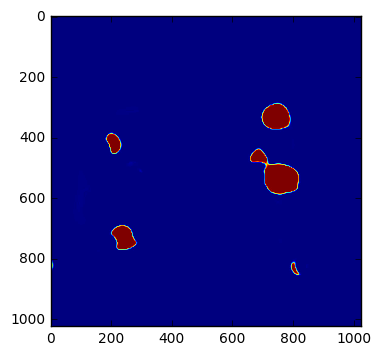

255.0
8 0
Center: (343.9657534246575, 145.66880247459125)
Center: (589.9233766233766, 243.9896103896104)
Center: (750.49343305363, 279.2234585917548)
Center: (245.64957035445758, 306.4513963480129)
Center: (317.5685148998534, 432.98339032730826)
Center: (818.9553526128868, 435.14967021816335)
Center: (677.6210526315789, 499.7578947368421)
Center: (310.61571906354516, 583.9839464882944)
found n nodules 8


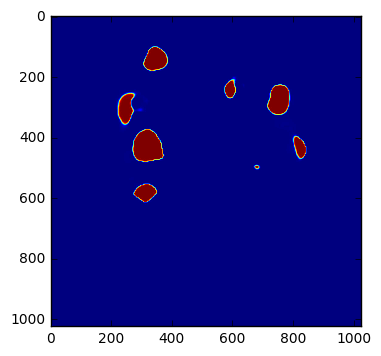

255.0
2 0
Center: (274.32398808480815, 315.1328193446644)
Center: (205.04406779661016, 404.7894538606403)
found n nodules 2


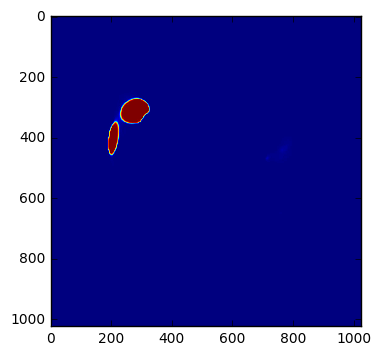

255.0
2 0
Center: (294.8911697621375, 181.63440860215053)
Center: (709.4078086210787, 264.5271947641616)
found n nodules 2


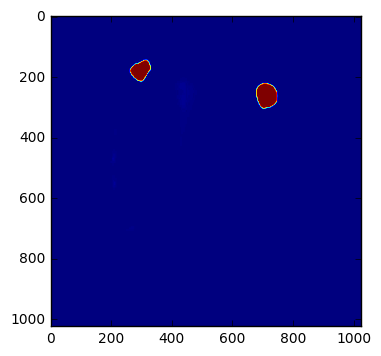

255.0
7 0
Center: (631.7935074913561, 283.8668843641952)
Center: (298.42424242424244, 303.4778554778555)
Center: (805.8666666666667, 360.53333333333336)
Center: (821.5570131180625, 430.58560376723847)
Center: (262.88064444608676, 460.6961791441874)
Center: (797.5303867403314, 653.6243093922652)
Center: (771.8823529411765, 665.3529411764706)
found n nodules 7


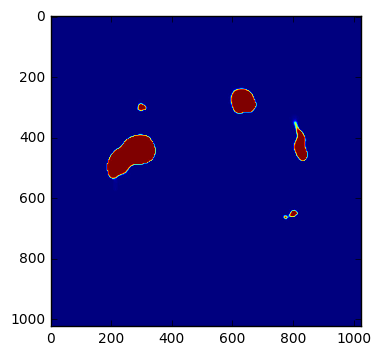

255.0
3 0
Center: (345.2728731942215, 146.21669341894062)
Center: (324.3477011494253, 188.98275862068965)
Center: (297.0288898060256, 356.6486174164259)
found n nodules 3


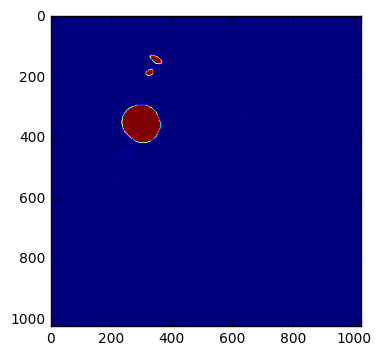

255.0
9 0
Center: (317.79553119730184, 170.51826869027545)
Center: (674.7587090163935, 195.22284836065575)
Center: (321.28288633461045, 319.3024691358025)
Center: (204.6475942782835, 344.6141092327698)
Center: (767.967032967033, 322.6373626373626)
Center: (641.3684531059683, 367.5401948842875)
Center: (205.1850220264317, 426.2026431718062)
Center: (785.7120694563051, 496.96114432109306)
Center: (164.19004975124378, 649.4825870646766)
found n nodules 9


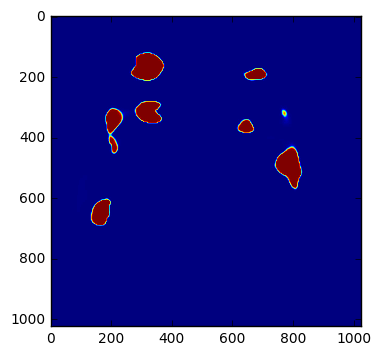

255.0
3 0
Center: (335.9485307373355, 191.93618171984858)
Center: (466.24744130042143, 253.4166164960867)
Center: (265.8321226795803, 341.51997578692493)
found n nodules 3


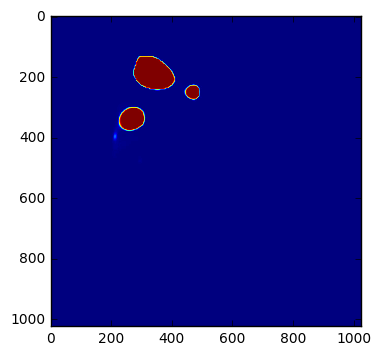

255.0
3 0
Center: (332.65806451612906, 367.26129032258063)
Center: (332.2959183673469, 452.1275510204082)
Center: (313.7083333333333, 555.7549368088468)
found n nodules 3


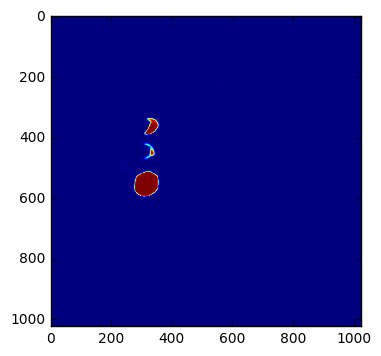

255.0
3 0
Center: (314.27927927927925, 203.4615726837949)
Center: (213.0663452093937, 479.4503973569069)
Center: (729.6898305084745, 426.67118644067796)
found n nodules 3


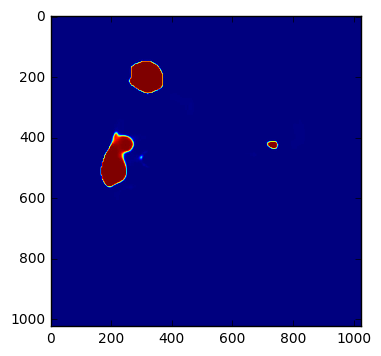

255.0
8 0
Center: (319.833667837431, 180.4372804816859)
Center: (687.8888006354249, 188.6155679110405)
Center: (743.7104693140794, 330.2238267148014)
Center: (205.44919786096256, 440.94117647058823)
Center: (743.0063559322034, 535.7436440677966)
Center: (127.48444444444445, 579.7055555555555)
Center: (806.0054, 635.879)
Center: (241.09787782625943, 734.1223720745736)
found n nodules 8


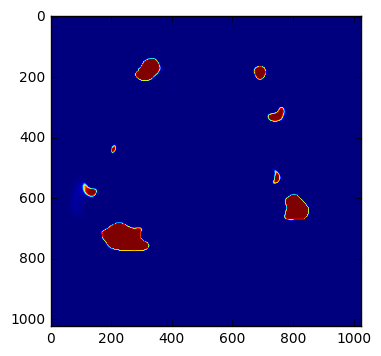

255.0
4 0
Center: (828.8971094946402, 328.01014548238896)
Center: (273.50440885369807, 324.68706136404535)
Center: (679.6829787234043, 443.91595744680853)
Center: (860.4249684741488, 466.6128625472888)
found n nodules 4


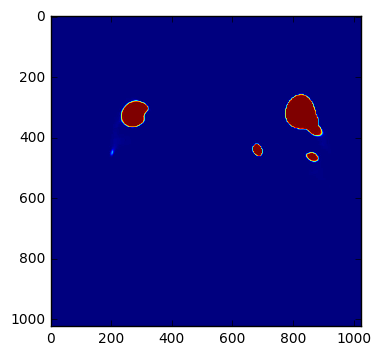

255.0
6 0
Center: (376.4099058037071, 134.9006381039198)
Center: (789.8711209276643, 350.8270568746549)
Center: (601.5147540983606, 314.92459016393445)
Center: (265.3293492695883, 475.10529311326127)
Center: (415.5237366003063, 407.0949464012251)
Center: (230.88386433710176, 579.2065775950668)
found n nodules 6


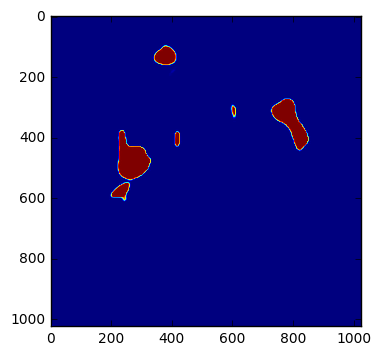

255.0
6 0
Center: (310.2119366626066, 26.628501827040196)
Center: (676.7167692864904, 24.82433900760594)
Center: (609.2536585365854, 200.27439024390245)
Center: (215.17397454031118, 447.5926449787836)
Center: (300.571145784816, 505.2572193758733)
Center: (326.1360946745562, 606.3688362919132)
found n nodules 6


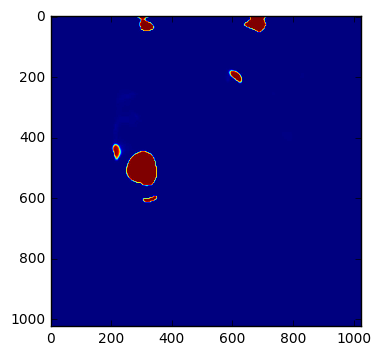

255.0
7 0
Center: (726.3655949618827, 170.68909512761022)
Center: (335.7603617181613, 196.7987942727958)
Center: (783.8928571428571, 325.1479591836735)
Center: (348.2476282360508, 458.79337514069783)
Center: (622.9805290227773, 517.2432035268185)
Center: (251.0444900752909, 648.0479123887748)
Center: (372.16288659793815, 681.6247422680412)
found n nodules 7


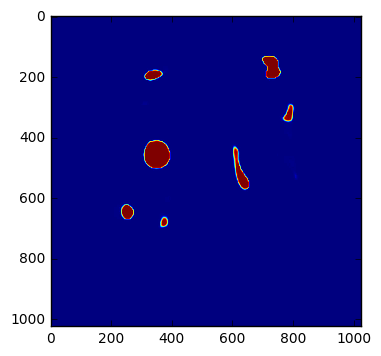

255.0
3 0
Center: (338.74351715547505, 161.37470275167024)
Center: (206.8289772727273, 348.1176136363636)
Center: (133.25247867189302, 667.0659442010607)
found n nodules 3


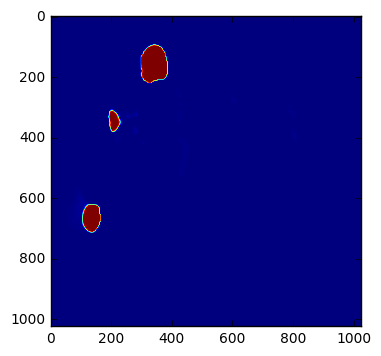

255.0
6 0
Center: (625.2052937378954, 241.7004519044545)
Center: (293.047569803516, 332.21964839710444)
Center: (307.81053435114507, 504.2937404580153)
Center: (804.0118553645525, 648.1310017783047)
Center: (990.6315956770502, 690.8515575333757)
Center: (853.1, 674.5714285714286)
found n nodules 6


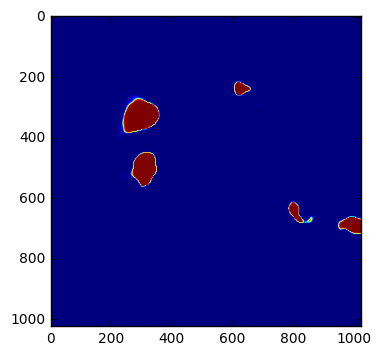

255.0
9 0
Center: (268.840249366842, 346.00759789596725)
Center: (618.7331460674158, 324.8511235955056)
Center: (812.7664796633941, 465.5210378681627)
Center: (268.7585089141005, 461.0162074554295)
Center: (298.61538461538464, 466.7435897435897)
Center: (214.3042431537767, 546.5282876918448)
Center: (194.19680920622466, 688.8120831698706)
Center: (838.0681618293755, 724.7884784520669)
Center: (195.5215931634366, 831.5695101480238)
found n nodules 9


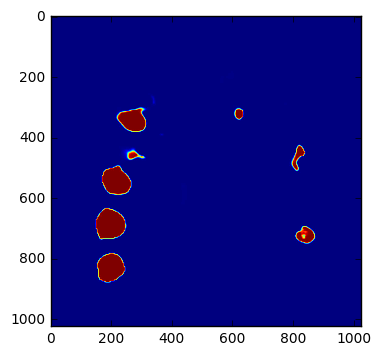

255.0
6 0
Center: (609.7879359095193, 222.6882657869934)
Center: (307.3322580645161, 302.30645161290323)
Center: (815.1189903846154, 430.4254807692308)
Center: (239.52300613496934, 441.11503067484665)
Center: (814.0878155872667, 535.8221734357849)
Center: (259.46175018982535, 572.123291571754)
found n nodules 6


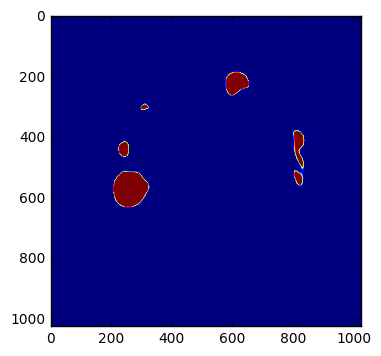

255.0
4 0
Center: (315.80691642651294, 142.1844380403458)
Center: (695.715780073989, 184.71718331419825)
Center: (229.33093922651935, 345.98552486187845)
Center: (188.0811441007306, 697.4284159801026)
found n nodules 4


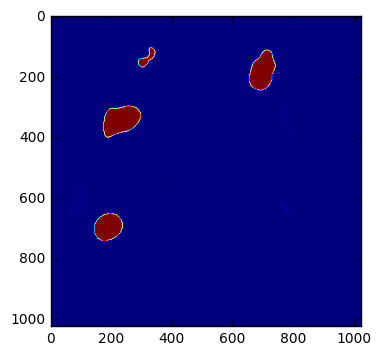

255.0
2 0
Center: (310.68890439637124, 304.55471039776694)
Center: (281.1354192740926, 583.2480600750939)
found n nodules 2


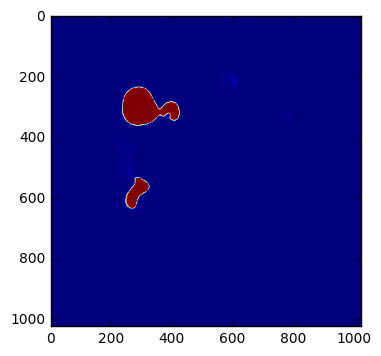

255.0
6 0
Center: (307.18883861236804, 154.93107088989441)
Center: (678.723076923077, 183.66153846153847)
Center: (252.86761188930646, 296.94174923129486)
Center: (721.3960880195599, 305.880195599022)
Center: (643.8125, 316.6875)
Center: (635.773851590106, 565.8056537102474)
found n nodules 6


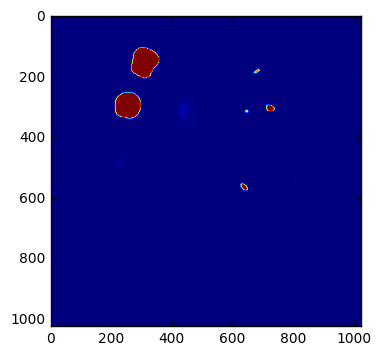

255.0
4 0
Center: (695.0555555555555, 11.393518518518519)
Center: (412.3965428466348, 470.45524089738876)
Center: (239.65103189493433, 561.7166979362102)
Center: (781.8100832837597, 623.7425639500298)
found n nodules 4


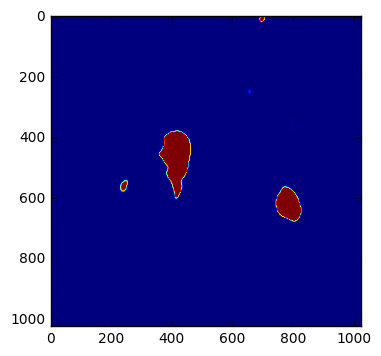

255.0
4 0
Center: (630.0628472222222, 226.08819444444444)
Center: (322.59737663960027, 285.1151780137414)
Center: (444.1583381198545, 593.1592954240858)
Center: (278.74725506756755, 642.5474028716217)
found n nodules 4


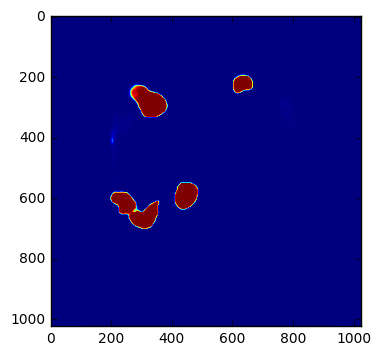

255.0
4 0
Center: (688.128883420486, 180.82343894186405)
Center: (271.1668375192209, 378.4666837519221)
Center: (812.9608540925267, 530.1281138790035)
Center: (218.67313019390582, 694.6371191135734)
found n nodules 4


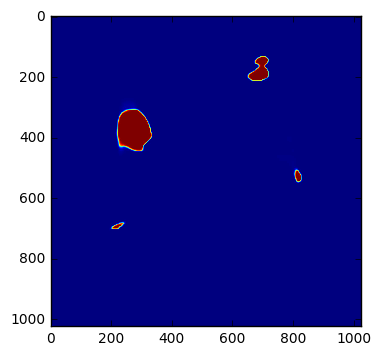

255.0
6 0
Center: (343.7330316742081, 171.78141315697877)
Center: (581.9230769230769, 249.6153846153846)
Center: (272.15625783797344, 360.74818159016803)
Center: (427.9191836734694, 440.79755102040815)
Center: (253.3639167309175, 456.9676175790285)
Center: (322.0788290883946, 525.9021551227382)
found n nodules 6


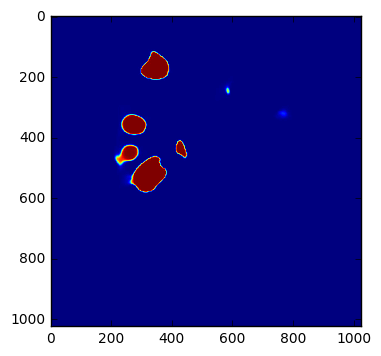

255.0
5 0
Center: (337.56553335063586, 225.26875162211263)
Center: (275.7359576078728, 364.38031794095383)
Center: (505.25714285714287, 336.42619047619047)
Center: (252.27604025020398, 477.74734838183304)
Center: (305.23975927004466, 542.3461463793438)
found n nodules 5


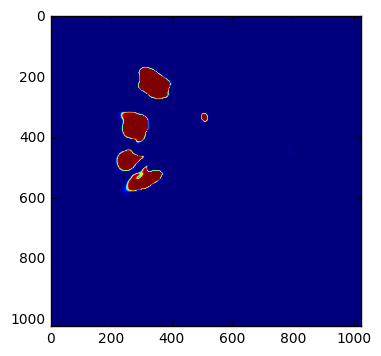

255.0
7 0
Center: (364.91875990042996, 166.5213849287169)
Center: (786.9713562272511, 378.5538851084032)
Center: (603.7162367223066, 439.5022761760243)
Center: (417.74922744128554, 502.7985166872682)
Center: (227.15906027344502, 640.0473714615829)
Center: (381.5710172744722, 607.1602687140115)
Center: (818.6967541129391, 675.9279679857715)
found n nodules 7


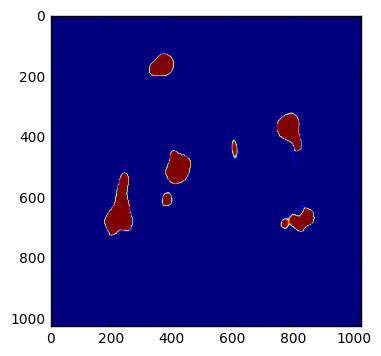

255.0
9 0
Center: (338.2856063468077, 333.0589346429921)
Center: (709.547619047619, 316.54761904761904)
Center: (859.5776782184741, 476.5384108578205)
Center: (222.29072923049986, 637.1370480609297)
Center: (752.6783216783217, 589.5104895104895)
Center: (836.9497271200672, 640.7381402183039)
Center: (836.1407473046818, 765.5618077093487)
Center: (194.6418853255588, 751.3265306122449)
Center: (978.1426914153133, 757.4048723897912)
found n nodules 9


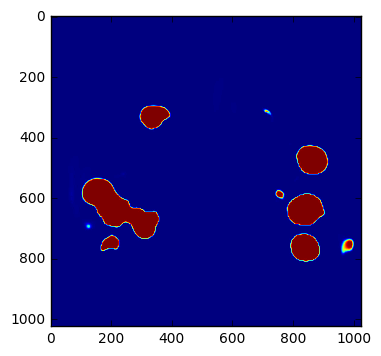

255.0
4 0
Center: (297.46697902721996, 163.9995537706381)
Center: (634.5203539823009, 176.13274336283186)
Center: (716.2478498827209, 266.75215011727914)
Center: (301.0, 373.0)
found n nodules 4


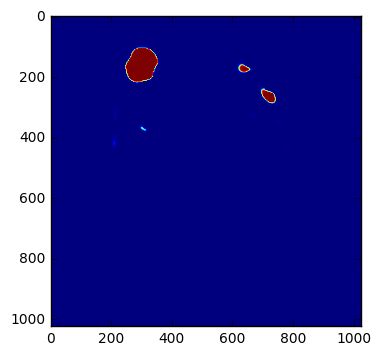

255.0
5 0
Center: (347.82124352331607, 166.5621761658031)
Center: (311.6404833836858, 194.06344410876133)
Center: (772.0719576719576, 332.12557319223987)
Center: (838.2362468584195, 501.37224239039375)
Center: (267.42937853107344, 432.6638418079096)
found n nodules 5


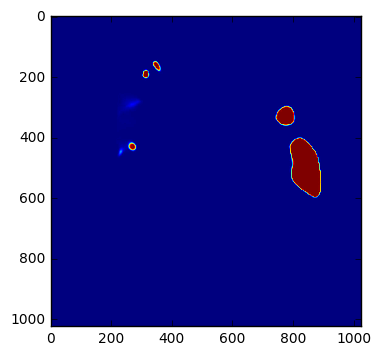

255.0
8 0
Center: (701.1410256410256, 4.256410256410256)
Center: (326.20242800677585, 166.00225861095427)
Center: (707.6666666666666, 169.73333333333332)
Center: (253.96005625879044, 391.3364275668073)
Center: (810.9713506139154, 413.3738062755798)
Center: (254.66788321167883, 479.3107804604155)
Center: (344.57142857142856, 481.85714285714283)
Center: (358.43040897097626, 547.2756431398417)
found n nodules 8


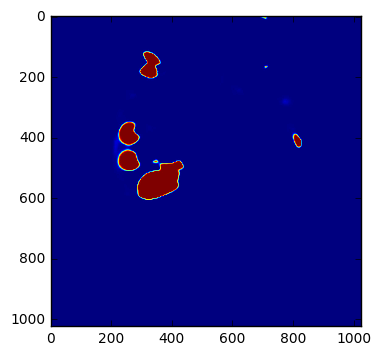

255.0
13 0
Center: (313.32933872365004, 158.44773317932427)
Center: (719.7831453500745, 316.341349223239)
Center: (213.3392002734108, 398.55827067669173)
Center: (330.0844504021448, 396.9182305630027)
Center: (744.7744227353463, 494.53818827708704)
Center: (787.0042142857143, 661.2931428571428)
Center: (127.36027469624933, 665.8972530375066)
Center: (338.65965965965967, 682.2542542542543)
Center: (813.6865467344544, 828.672663277278)
Center: (189.73465637633223, 830.8849687614847)
Center: (4.094462540716612, 827.6351791530944)
Center: (67.70655567117586, 837.5900104058272)
Center: (30.460526315789473, 837.1842105263158)
found n nodules 13


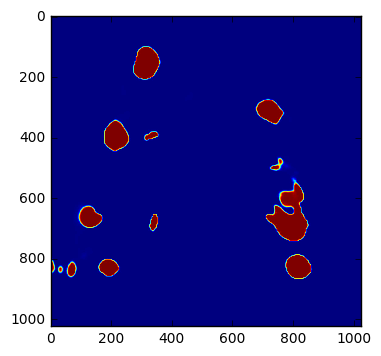

255.0
5 0
Center: (284.9363276365152, 198.97290537724052)
Center: (723.4583828775268, 444.8955112960761)
Center: (753.0085688514732, 543.1846061334937)
Center: (753.889573703133, 648.4786851566513)
Center: (267.3089504185447, 685.2168705730844)
found n nodules 5


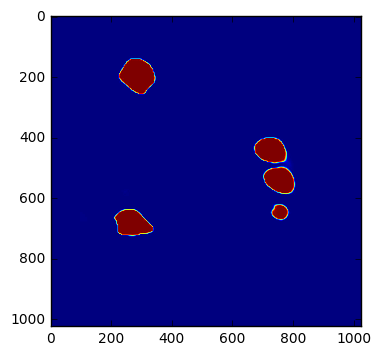

255.0
8 0
Center: (308.58472873409244, 159.92860013395847)
Center: (679.4416510318949, 170.5375234521576)
Center: (210.88173555507467, 350.0966241073361)
Center: (307.46974296701075, 387.52863792754505)
Center: (134.09280303030303, 543.5407196969697)
Center: (134.76283482142858, 669.4591238839286)
Center: (337.1061598951507, 673.3813892529489)
Center: (807.4510922498956, 796.0745791011549)
found n nodules 8


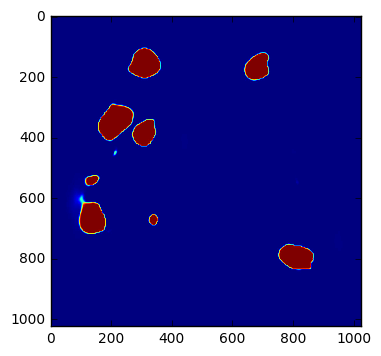

255.0
7 0
Center: (407.68895800933126, 163.54199066874028)
Center: (306.58754455860765, 335.68232333822607)
Center: (429.9522502744237, 490.8331503841932)
Center: (838.8743885119142, 542.8183683130819)
Center: (263.42885028303726, 537.5939878977161)
Center: (266.8414442700157, 641.7755102040817)
Center: (823.0713091074958, 667.3979017789266)
found n nodules 7


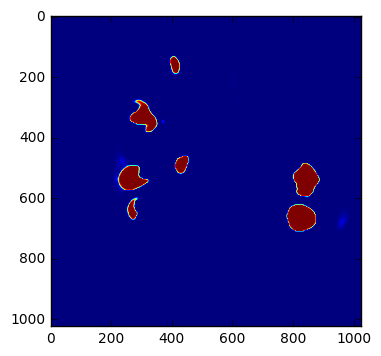

255.0
2 0
Center: (310.752590489709, 226.85592618878638)
Center: (205.96899224806202, 543.6511627906976)
found n nodules 2


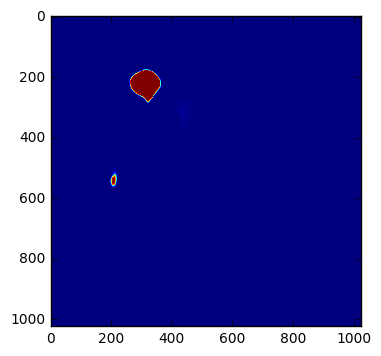

255.0
8 0
Center: (699.1968365553603, 141.90861159929702)
Center: (675.425, 215.525)
Center: (265.08137007226367, 371.9903648434287)
Center: (722.7638390326847, 332.61042886831666)
Center: (786.8802521008404, 423.0700280112045)
Center: (806.0204005934718, 582.0574925816023)
Center: (639.8589482266613, 572.7953526294333)
Center: (246.98724383103303, 703.4782517774989)
found n nodules 8


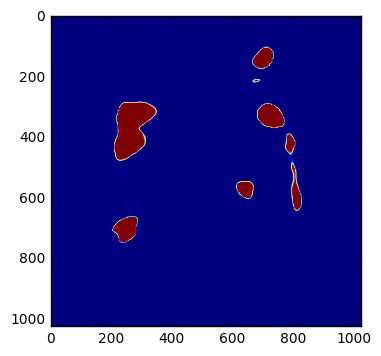

255.0
2 0
Center: (204.64190407500902, 403.20338983050846)
Center: (324.81353265145555, 501.0351429320745)
found n nodules 2


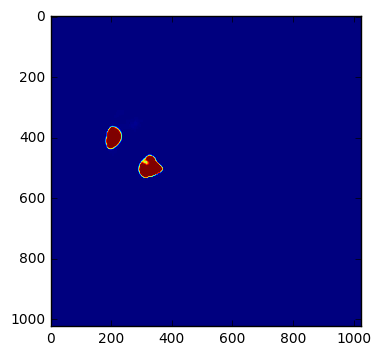

255.0
4 0
Center: (321.79820512820515, 136.94128205128206)
Center: (212.03484848484848, 385.1469696969697)
Center: (125.14664457332229, 646.4154929577464)
Center: (822.6659380692167, 664.6989071038251)
found n nodules 4


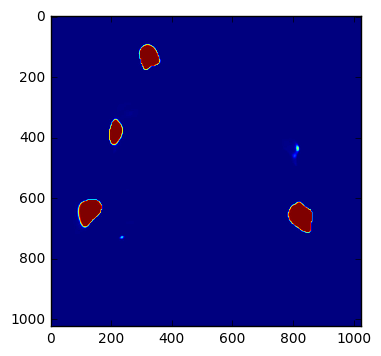

255.0
11 0
Center: (299.0939907550077, 155.5595421527625)
Center: (332.34303320780555, 315.8956692913386)
Center: (793.5596723868955, 326.00078003120126)
Center: (166.0012267788293, 383.8914300736067)
Center: (779.7992571630704, 409.440749911567)
Center: (121.63215898825655, 545.5705510388437)
Center: (204.83192723437912, 617.655286053256)
Center: (6.896938013442868, 669.7020164301717)
Center: (751.7828773168579, 664.7325684024713)
Center: (835.3140417457306, 664.3481973434535)
Center: (988.4549122807017, 690.2352631578948)
found n nodules 11


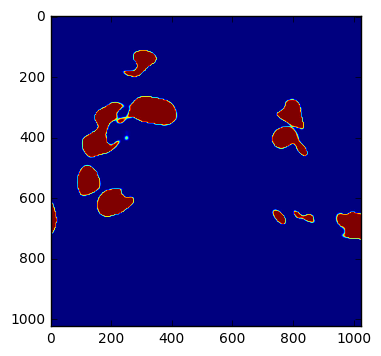

255.0
1 0
Center: (194.7589405154731, 683.139302595202)
found n nodules 1


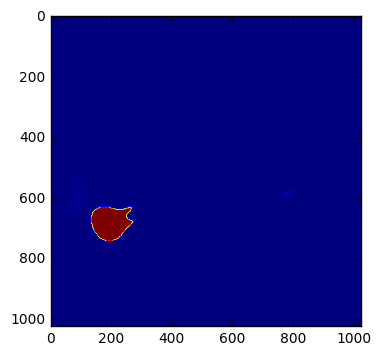

255.0
6 0
Center: (323.8965517241379, 116.24137931034483)
Center: (305.3918918918919, 164.6099099099099)
Center: (715.4512670565302, 302.4863547758285)
Center: (744.5844116761962, 462.7899488414084)
Center: (261.85740402193784, 517.4951249238269)
Center: (160.68278301886792, 641.6639150943396)
found n nodules 6


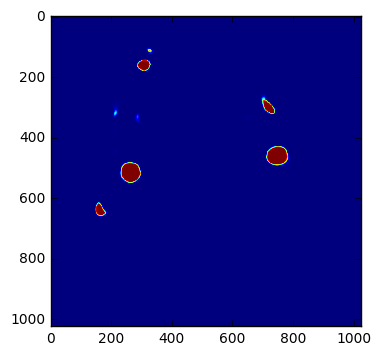

255.0
3 0
Center: (749.2558909813571, 363.3362354499858)
Center: (201.74795918367346, 403.49795918367346)
Center: (164.06176331918905, 671.4790193305045)
found n nodules 3


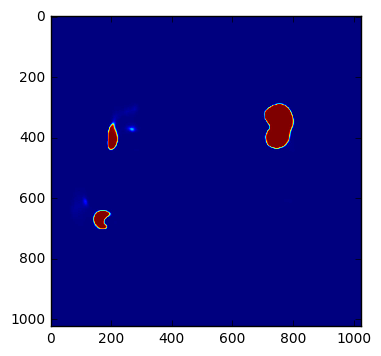

255.0
4 0
Center: (271.208460049765, 289.2117777163395)
Center: (223.68791946308724, 381.1054086063956)
Center: (805.4023279935461, 444.66520686873343)
Center: (292.23314829500396, 500.028152260111)
found n nodules 4


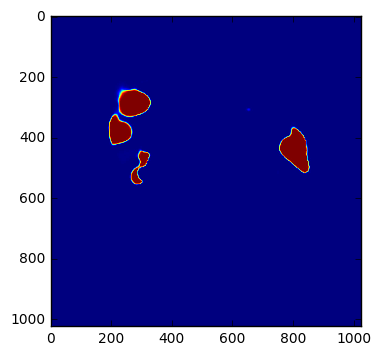

255.0
6 0
Center: (366.88730277986474, 159.20022539444028)
Center: (614.258346581876, 263.50370959194487)
Center: (263.51390909090907, 397.8855909090909)
Center: (760.9051325199832, 322.7684055532183)
Center: (816.5028248587571, 549.9971751412429)
Center: (305.15949895615864, 651.3837160751566)
found n nodules 6


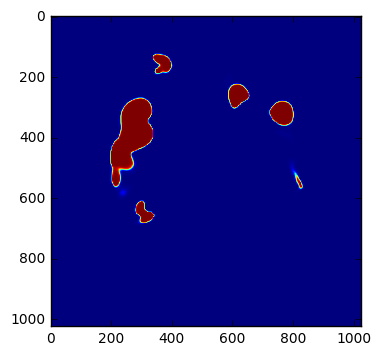

255.0
6 0
Center: (302.33501118568233, 167.465697240865)
Center: (653.6311300639659, 195.28358208955223)
Center: (478.44558258642763, 263.5032010243278)
Center: (727.6491051534537, 386.70646158269244)
Center: (210.0188679245283, 343.9622641509434)
Center: (202.86776859504133, 421.24203069657614)
found n nodules 6


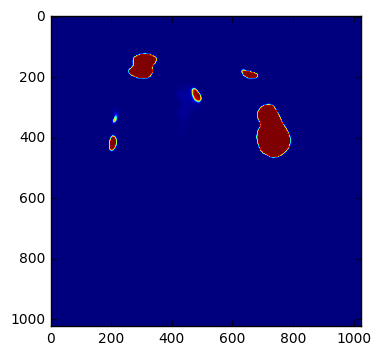

255.0
3 0
Center: (686.7222222222222, 171.33333333333334)
Center: (231.0337448559671, 477.6166666666667)
Center: (267.22257700976706, 554.2146882043576)
found n nodules 3


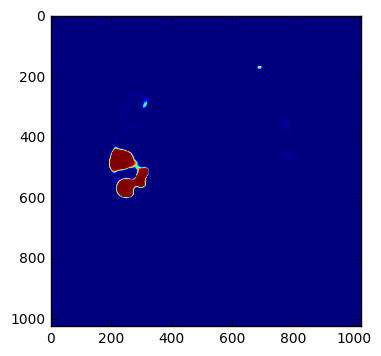

255.0
5 0
Center: (257.429102496017, 384.24662772172064)
Center: (259.8374224061484, 559.3080106414425)
Center: (208.72992700729927, 596.4671532846716)
Center: (280.65579710144925, 652.695652173913)
Center: (301.77966101694915, 685.942218798151)
found n nodules 5


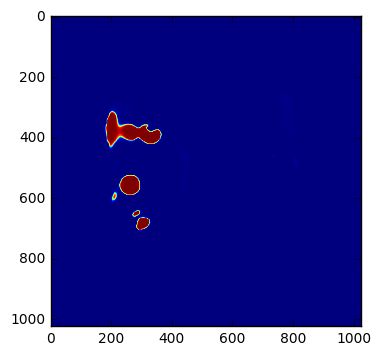

255.0
6 0
Center: (331.2730337078652, 177.8674157303371)
Center: (722.1605667060212, 184.59149940968123)
Center: (408.612760952661, 285.50955601293737)
Center: (298.92130670546226, 344.922629281841)
Center: (322.4739583333333, 407.1822916666667)
Center: (307.90328820116054, 457.7195357833656)
found n nodules 6


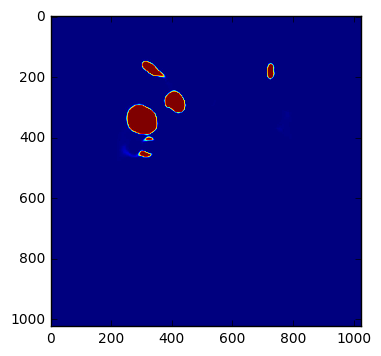

255.0
1 0
Center: (275.05919661733617, 370.9217758985201)
found n nodules 1


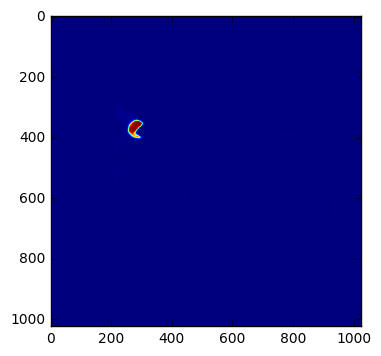

255.0
9 0
Center: (252.8141167775314, 401.1736881005174)
Center: (310.61764705882354, 404.3333333333333)
Center: (239.25118483412322, 491.5876777251185)
Center: (819.0975609756098, 530.8932926829268)
Center: (306.7875381403565, 626.1372249879557)
Center: (202.51576030481468, 598.9494284724627)
Center: (810.8178090216754, 697.3907439953134)
Center: (162.18822170900694, 702.0704387990762)
Center: (795.9805504587156, 806.2535779816513)
found n nodules 9


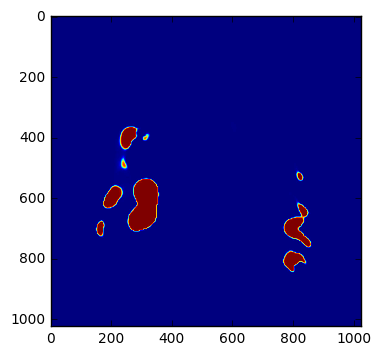

255.0
9 0
Center: (252.9894916216984, 309.86963930701506)
Center: (304.10107227958696, 395.1701747418586)
Center: (819.6359516616315, 418.4501510574018)
Center: (830.5781990521327, 503.4007701421801)
Center: (245.60359801488835, 486.64495450785773)
Center: (276.3666666666667, 609.3333333333334)
Center: (137.72090988626422, 663.4838145231846)
Center: (150.19030925253537, 748.4408413672218)
Center: (921.9355143126769, 778.5703051273986)
found n nodules 9


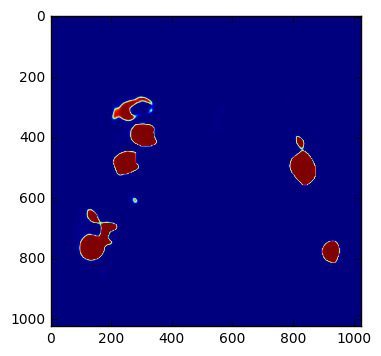

255.0
3 0
Center: (302.8034648700674, 260.7274302213667)
Center: (660.1475625823452, 312.41040843214756)
Center: (706.187119130123, 546.8921018042777)
found n nodules 3


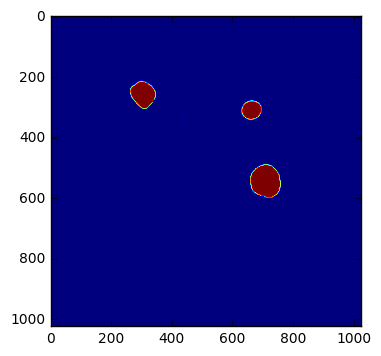

255.0
3 0
Center: (756.1214057507988, 338.8897763578275)
Center: (308.63430311231394, 422.7493234100135)
Center: (247.40316827528326, 696.031577843055)
found n nodules 3


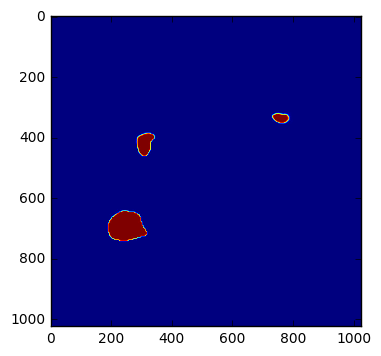

255.0
8 0
Center: (321.47153092006033, 158.75641025641025)
Center: (842.5739758420144, 417.9917556081038)
Center: (210.39287671232876, 371.40438356164384)
Center: (675.75625, 416.3154411764706)
Center: (329.41714285714284, 428.36857142857144)
Center: (404.30281690140845, 444.8104008667389)
Center: (351.9096385542169, 565.0602409638554)
Center: (153.93538767395626, 599.530815109344)
found n nodules 8


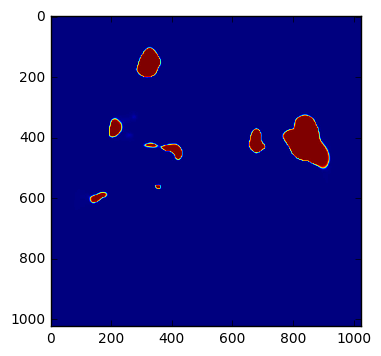

255.0
9 0
Center: (645.0620581304006, 284.06677140612726)
Center: (304.00217835262083, 301.1640571817563)
Center: (724.2590909090909, 304.6106060606061)
Center: (271.3558599695586, 390.3214611872146)
Center: (240.36203090507726, 587.1095725466587)
Center: (826.2414551855655, 630.1073786122928)
Center: (310.47172236503854, 649.4048843187661)
Center: (210.260519575558, 722.9114526161727)
Center: (303.4102564102564, 699.8205128205128)
found n nodules 9


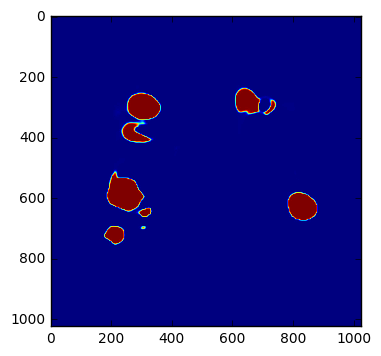

255.0
5 0
Center: (814.6302888824044, 399.19900787861104)
Center: (428.95762711864404, 472.4279661016949)
Center: (766.5022692889561, 536.9062027231467)
Center: (862.4976228209192, 567.905705229794)
Center: (316.9682750178517, 614.0172396205244)
found n nodules 5


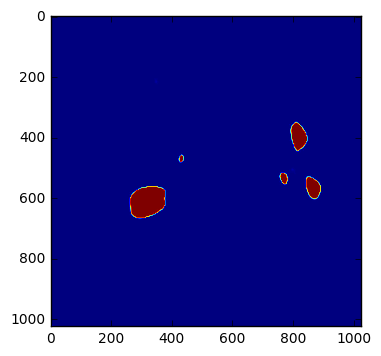

255.0
8 0
Center: (809.3171403962102, 374.87665805340225)
Center: (620.311214953271, 382.35046728971963)
Center: (228.71005917159763, 423.1301775147929)
Center: (450.2436053593179, 454.22655298416566)
Center: (224.82693569553805, 506.5241141732283)
Center: (433.16485384092454, 545.2178789938818)
Center: (328.19874804381845, 579.1111111111111)
Center: (777.125, 595.25)
found n nodules 8


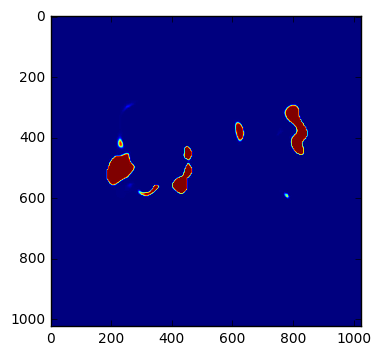

255.0
5 0
Center: (328.6344925479063, 168.94819020581974)
Center: (121.52272727272727, 512.2954545454545)
Center: (917.0616381304951, 617.2140212864415)
Center: (115.94, 623.8376470588236)
Center: (15.204647370566652, 687.7680391357521)
found n nodules 5


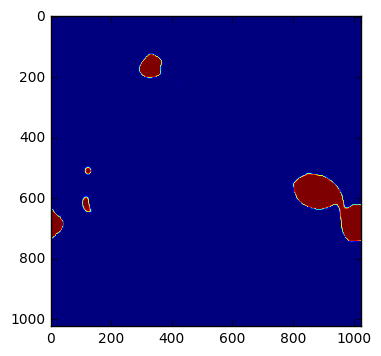

255.0
7 0
Center: (720.0120240480962, 208.30260521042084)
Center: (321.8072787427626, 423.61538461538464)
Center: (311.310502283105, 525.4885844748859)
Center: (438.29811320754715, 618.6996855345911)
Center: (283.77194092827006, 628.8754219409283)
Center: (825.4598308668076, 629.8722692036646)
Center: (330.8771790808241, 705.8452192287375)
found n nodules 7


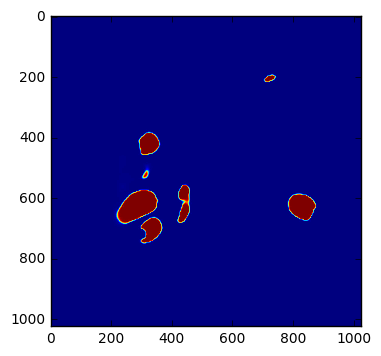

255.0
5 0
Center: (620.018018018018, 238.58028616852147)
Center: (827.7609903991915, 422.71096513390603)
Center: (231.23478939157567, 450.1684867394696)
Center: (297.2119067065977, 551.0605318086941)
Center: (779.3350357507661, 552.561797752809)
found n nodules 5


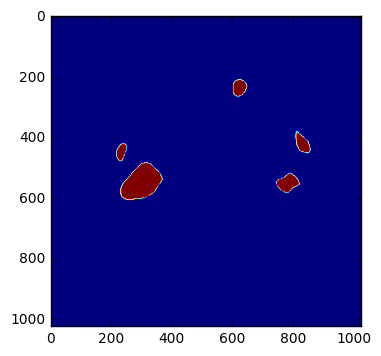

255.0
4 0
Center: (350.83376013657704, 20.28894579598805)
Center: (628.9629715882627, 22.61061946902655)
Center: (265.61862047633775, 193.16362511599135)
Center: (205.9017094017094, 323.05982905982904)
found n nodules 4


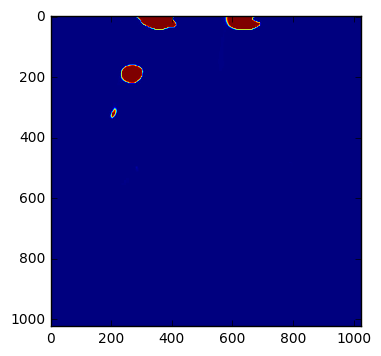

255.0
5 0
Center: (319.6481225401553, 179.90660568024677)
Center: (728.4755822689707, 160.84222389181068)
Center: (838.5129434324065, 443.82339405560884)
Center: (120.17073170731707, 576.7329268292683)
Center: (3.967821782178218, 697.1955445544554)
found n nodules 5


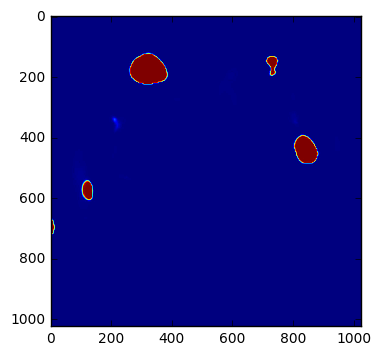

255.0
10 0
Center: (696.4204963971177, 156.59775820656526)
Center: (324.9759036144578, 123.16867469879519)
Center: (311.38870588235295, 174.5844705882353)
Center: (222.72504957038996, 380.2251156642432)
Center: (627.9272727272727, 294.90909090909093)
Center: (259.1401098901099, 413.9862637362637)
Center: (748.2695417789757, 556.822102425876)
Center: (279.7669098797081, 630.1273910471308)
Center: (742.8412458421531, 662.155427880254)
Center: (130.68372379778052, 692.9966091245376)
found n nodules 10


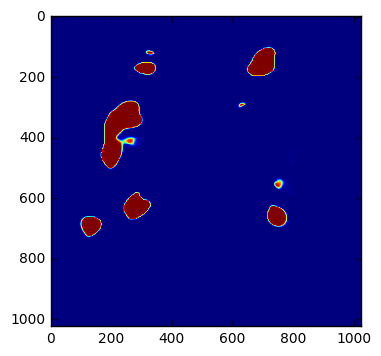

255.0
10 0
Center: (305.8231374924288, 271.9913688673531)
Center: (312.2668822768435, 449.2294954721863)
Center: (413.83087834151667, 533.5144571740317)
Center: (245.63401670463173, 574.3014426727411)
Center: (789.204212265125, 601.2884575676234)
Center: (823.8534591194968, 675.8289308176101)
Center: (238.4888825541619, 689.7226339794755)
Center: (741.0156971375808, 716.4995383194829)
Center: (787.8095238095239, 733.1428571428571)
Center: (815.8574739281576, 812.061123986095)
found n nodules 10


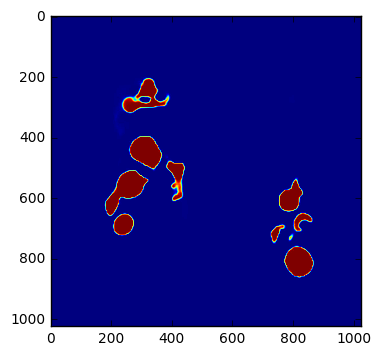

255.0
8 0
Center: (347.2113606340819, 140.22853368560106)
Center: (318.140625, 268.0553125)
Center: (269.2729161022306, 357.2535898130588)
Center: (265.7693172239393, 492.09047485248664)
Center: (811.7467811158798, 481.85836909871244)
Center: (766.4683954619125, 504.51701782820095)
Center: (277.6671767406274, 632.265493496557)
Center: (141.96100827097283, 698.1646317447814)
found n nodules 8


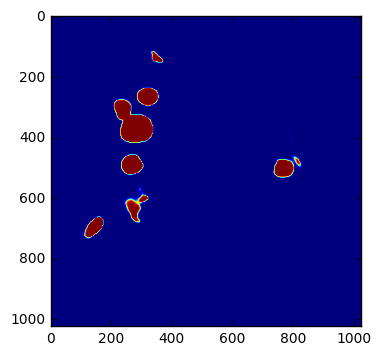

255.0
3 0
Center: (303.255, 201.9410606060606)
Center: (632.4188679245283, 214.33056603773585)
Center: (140.91119926762283, 618.0697792696573)
found n nodules 3


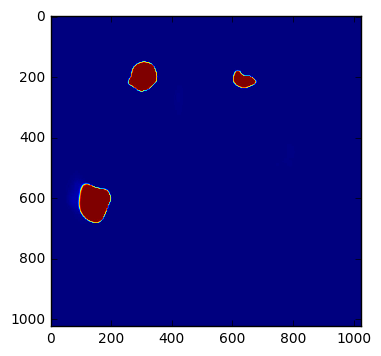

255.0
4 0
Center: (131.41501976284584, 395.0)
Center: (816.2739726027397, 568.9589041095891)
Center: (151.4265734265734, 675.6599502192722)
Center: (2.588235294117647, 809.9276018099547)
found n nodules 4


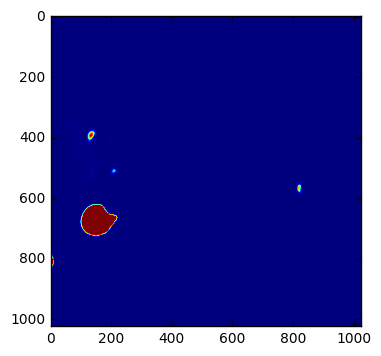

In [194]:
# make coordinate file for testresults 
testResultPath = '/home/jupyter_1/Finalcombine/testResultimages/'
trainResultPath = '/home/jupyter_1/Finalcombine/trainResultimages/'
import pylab
from pylab import imshow
import csv 
split=0.6
testResult= os.listdir(testResultPath)
trainResult = os.listdir(trainResultPath)

totalnumberofTest = len(testResult)
totalnumberofTrain = len(trainResult)

coordinateofTest=np.zeros((10000,3))
count =0
number =108
allcountbefore=0
for count in range(totalnumberofTest):

    number=number+1
    while number in testDelete:
        number=number+1
    fname = testResultPath+'testResult{0:03d}.jpg'.format(number)
#         print(fname)
    itk_image = sitk.ReadImage(fname)
    itk_image = sitk.Cast(itk_image, sitk.sitkUInt64)

    slice = sitk.GetArrayFromImage(itk_image)[:,:]
    up = np.divide(np.max(slice),1.00000)
    itk_image =sitk.BinaryThreshold(itk_image,split*up,up,1,0)
    print(up)
    imshow(slice)
    nodules=getROICenters(itk_image,0)
    pylab.show()
    labels =len(nodules)
    la=0
    for nodule in nodules:
        coordinateofTest[allcountbefore+la,0]=number
        coordinateofTest[allcountbefore+la,1]=nodules[la][0]#x 
        coordinateofTest[allcountbefore+la,2]=nodules[la][1]#y
        la = la+1
    
    allcountbefore = allcountbefore+labels
    

with open('coordinateTest.txt', 'w') as f:

    for n,x, y in coordinateofTest: 
        if n !=0:
            f.write('{} {} {}\n'.format(n,x, y))

            

# make coordinate file for train results 
testResultPath = '/home/jupyter_1/Finalcombine/testResultimages/'
trainResultPath = '/home/jupyter_1/Finalcombine/trainResultimages/'
coordinateofTrain = np.zeros((10000,3))
count =0
number =0
allcountbefore=0
for count in range(totalnumberofTrain):
    number=number+1
    while number in trainDelete:
        number=number+1
    fname = trainResultPath+'trainResult{0:03d}.jpg'.format(number)
    itk_image = sitk.ReadImage(fname)
    itk_image = sitk.Cast(itk_image, sitk.sitkUInt64)

    slice = sitk.GetArrayFromImage(itk_image)[:,:]
    up = np.divide(np.max(slice),1.00000)
    itk_image =sitk.BinaryThreshold(itk_image,split*up,up,1,0)
    print(up)
    imshow(slice)
    nodules=getROICenters(itk_image,0)
    pylab.show()
    labels =len(nodules)
    la=0
    
    for nodule in nodules:
        coordinateofTrain[allcountbefore+la,0]=number
        coordinateofTrain[allcountbefore+la,1]=nodules[la][0]#x 
        coordinateofTrain[allcountbefore+la,2]=nodules[la][1]#y
        la = la+1
    
    allcountbefore = allcountbefore+labels
    

with open('coordinateTrain.txt', 'w') as f:

    for n,x, y in coordinateofTrain: 
        if n !=0:
            f.write('{} {} {}\n'.format(n,x, y))

[311.54038893044128, 604.27957746478876, 307.56459400146304] [289.64584891548242, 369.55845070422538, 813.09422092172645]
341.6 341.05


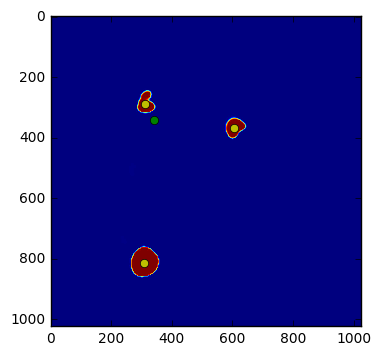

In [195]:
#visualize the result is right
testResultPath='/home/jupyter_1/Finalcombine/testResultimages/'
fname = testResultPath+'testResult154.jpg'
data = scipy.misc.imread(fname)
plt.clf() # clear all mess out.
plt.imshow(data)
plt.savefig('/home/jupyter_1/Finalcombine/try/data.png', bbox_inches = 'tight')

plt.autoscale(False)
xx=[]
yy=[]
for n,x, y in coordinateofTest:
    if n ==154:
        xx.append(x)
        yy.append(y)

plt.plot(xx,yy, 'yo')
print(xx,yy)
plt.savefig('/home/jupyter_1/Finalcombine/try/result.png', bbox_inches = 'tight')
plt.autoscale(False)


filePath='/home/jupyter_1/Finalcombine/'
TestTruth = np.loadtxt(filePath+'coordinateTestTtuth.txt')
xxx=TestTruth[32,0]
yyy=TestTruth[32,1]
plt.plot(xxx,yyy, 'go')
print(xxx,yyy)
plt.savefig('/home/jupyter_1/Finalcombine/try/result.png', bbox_inches = 'tight')
plt.show()

[276.10216836041519, 790.00583791208794] [426.88881039073965, 392.86950549450552]
253.017857143 497.285714286


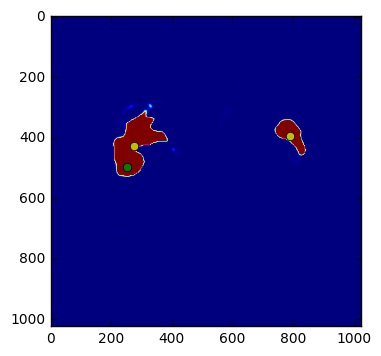

In [196]:
#visualize the result is right
testResultPath='/home/jupyter_1/Finalcombine/testResultimages/'
fname = testResultPath+'testResult109.jpg'
data = scipy.misc.imread(fname)
plt.clf() # clear all mess out.
plt.imshow(data)
plt.savefig('/home/jupyter_1/Finalcombine/try/data.png', bbox_inches = 'tight')

plt.autoscale(False)
xx=[]
yy=[]
for n,x, y in coordinateofTest:
    if n ==109:
        xx.append(x)
        yy.append(y)

plt.plot(xx,yy, 'yo')
print(xx,yy)
plt.savefig('/home/jupyter_1/Finalcombine/try/result.png', bbox_inches = 'tight')
plt.autoscale(False)


filePath='/home/jupyter_1/Finalcombine/'
TestTruth = np.loadtxt(filePath+'coordinateTestTtuth.txt')
xxx=TestTruth[0,0]
yyy=TestTruth[0,1]
plt.plot(xxx,yyy, 'go')
print(xxx,yyy)
plt.savefig('/home/jupyter_1/Finalcombine/try/result.png', bbox_inches = 'tight')
plt.show()

In [200]:
# judge if the segmentation results are right

# read in txt file.
Test = np.loadtxt(filePath+'coordinateTest.txt')
TestTruth = np.loadtxt(filePath+'coordinateTestTtuth.txt')
print(np.shape(Test),np.shape(TestTruth))

distTest=np.zeros((len(Test),1))

labellistTest = []
Numb =0
account =0
preN=109
i=0
for n ,x, y in coordinateofTest:
    if n !=0:
        if preN==n:
            distTest[account,0] = np.linalg.norm(Test[account,1:] -TestTruth[i,:] )
            Numb=Numb+1
        else:
            labellistTest.append(Numb)
            Numb=0
            i=i+1
#             print(account)
#             print(preN)
            distTest[account,0] = np.linalg.norm(Test[account,1:] -TestTruth[i,:] )
            Numb=Numb+1

        
        
        
        #         print(Test[account,1:],TestTruth[i,:],distTest[account])
        account=account+1
        preN=n  
labellistTest.append(Numb)
        
        
        
        
print('test')
# print(distTest)
print(labellistTest)
print ('training')




# read in txt file.
Train =np.loadtxt(filePath+'coordinateTrain.txt')
TrainTruth = np.loadtxt(filePath+'coordinateTrainTruth.txt')
print(np.shape(Train),np.shape(TrainTruth))
distTrain=np.zeros((len(Train),1))
labellistTrain =[]
Numb =0
account =0
preN=1
i=0
for n ,x, y in coordinateofTrain:
    if n !=0:
        if preN==n:
            distTrain[account,0] = np.linalg.norm(Train[account,1:] -TrainTruth[i,:] )
            Numb=Numb+1
        else:
            labellistTrain.append(Numb)
            Numb=0
            i=i+1
#             print(account)
#             print(preN)
            distTrain[account,0] = np.linalg.norm(Train[account,1:] -TrainTruth[i,:] )
            Numb=Numb+1
#         print(Test[account,1:],TestTruth[i,:],distTest[account])
        account=account+1
        preN=n   
labellistTrain.append(Numb)
# print(distTrain)
print(labellistTrain)

(156, 3) (33, 2)
test
[2, 10, 1, 3, 8, 7, 7, 5, 2, 2, 7, 4, 4, 5, 6, 5, 3, 5, 6, 6, 3, 3, 5, 4, 3, 5, 2, 10, 4, 6, 4, 6, 3]
training
(514, 3) (95, 2)
[4, 4, 2, 3, 3, 1, 3, 10, 8, 4, 2, 8, 5, 7, 3, 4, 8, 6, 5, 2, 7, 6, 6, 5, 6, 7, 6, 8, 2, 2, 7, 3, 9, 3, 3, 3, 8, 4, 6, 6, 7, 3, 6, 9, 6, 4, 2, 6, 4, 4, 4, 6, 5, 7, 9, 4, 5, 8, 13, 5, 8, 7, 2, 8, 2, 4, 11, 1, 6, 3, 4, 6, 6, 3, 5, 6, 1, 9, 9, 3, 3, 8, 9, 5, 8, 5, 7, 5, 4, 5, 10, 10, 8, 3, 4]


In [201]:
thresholdfortrueorfalse = 113  # based on the size of Alexnet
# Test
print('result after Unet')
with open('trueorfalisefortest.txt', 'w') as f:
    for i in range (len(distTest)):
        if distTest[i,0]< thresholdfortrueorfalse:
        # which means true positive TP
            f.write('1\n')
        else :
            f.write('0\n')
#Train     
with open('trueorfalsefortrain.txt','w') as f:
    for i in range (len(distTrain)):
        if distTrain[i,0]< thresholdfortrueorfalse:
        # which means true positive
            f.write('1\n')
        else :
            f.write('0\n')    
#Calculate the Precision and recall after Unet 
Test = np.loadtxt(filePath+'trueorfalisefortest.txt')
Train =np.loadtxt(filePath+'trueorfalsefortrain.txt')
SumofTP = np.sum(Test)+np.sum(Train)
SumofFPandTP = len(Test)+len(Train)
SumofFP = SumofFPandTP-SumofTP
Precision =SumofTP/SumofFPandTP

# Presicion
print('Precision:',Precision)


#FN 
base =0
Base =0
FNtest =0
Sumpart =0
for num in labellistTest:
    Base=base
    for i in  range(num):
        Base=Base+1
#         print(Base-1,base)
        Sumpart=Test[Base-1]
    if Sumpart<1:
        FNtest=FNtest+1
    base = Base
# print('FN:',FNtest)
base =0
Base =0
FNtrain =0
Sumpart =0
for num in labellistTrain:
    Base=base
    for i in  range(num):
        Base=Base+1
#         print(Base-1,base)
        Sumpart=Train[Base-1]+Sumpart
    if Sumpart<1:
        FNtrain=FNtrain+1
    base = Base
# print('FN:',FNtrain)
SumofFN=FNtest+FNtrain
# print('sum of FN ',SumofFN)

# recall 
Recall = SumofTP/(SumofTP+SumofFN)
print('Recall:',Recall)

result after Unet
Precision: 0.171641791045
Recall: 0.804195804196


In [6]:
# # get patches 
patchsize = 400
uphalf=199
downhalf = 200
testResultPath = '/home/jupyter_1/Unetforfullimage/dataonlyPositive/test/images/'
trainResultPath = '/home/jupyter_1/Unetforfullimage/dataonlyPositive/train/images/'
# destination files
testdestPath = '/home/jupyter_1/Finalcombine/testpatches/'
traindestPath = '/home/jupyter_1/Finalcombine/trainpatches/'

# get coordinate of results 
coordinateofTest= np.loadtxt('coordinateTest.txt')
coordinateofTrain=np.loadtxt('coordinateTrain.txt')
coordinateofTestTruth = np.loadtxt('coordinateTestTtuth.txt')
coordinateofTrainTruth= np.loadtxt('coordinateTrainTruth.txt')
# get patches wrt coordinate
#test
number=108
counter=0
signal =1
labelstarter = 0
print(len(coordinateofTest))
for i in range(len(coordinateofTest)):
    
    if signal==1:
        
        number = number+1
        while number in testDelete:
            number=number+1
        fname = testResultPath+'true{0:03d}.JPEG'.format(number)
        im =Image.open(fname)
        arrayIm = np.asarray(im)

    #####################
    counter = counter+1
    if counter == labellistTest[labelstarter]:
        counter=0
        signal=1
        labelstarter=labelstarter+1
        
    else:
        signal=0
   
    # get the coordinate of each spot
    x =coordinateofTest[i,1]
    y =coordinateofTest[i,2]
    
    #####################################
    xlu = int(x)-uphalf
    ylu = int(y)-uphalf
    xrd = int(x)+downhalf
    yrd = int(y)+downhalf
    #prevent the case when the spot is beside one or two boder 
    if xlu <=0:
        xlu = 0
        xrd = patchsize
    if ylu <=0:
        ylu=0
        yrd =patchsize
    if xrd >= 1024:
        xrd =1024
        xlu = 1024-patchsize
    if yrd >= 1024:
        yrd =1024
        ylu =1024-patchsize
    #cut 
    print(i,number,labelstarter,counter)
    patch = np.copy(arrayIm[ylu:yrd, xlu:xrd])##########一定注意这里的x, y 顺序！！！！！###############
    scipy.misc.imsave(testdestPath +'test{0:03d}_'.format(number)+'Patch{0:03d}.jpg'.format(counter),patch)
    
#train
number=0
counter=0
signal =1
labelstarter = 0
print(len(coordinateofTrain))
for i in range(len(coordinateofTrain)):
    if signal ==1:
#         print(i,number,labelstarter)
        number = number+1
        while number in trainDelete:
            number=number+1
        fname = trainResultPath+'true{0:03d}.JPEG'.format(number)
        im =Image.open(fname)
        arrayIm = np.asarray(im)
        
    
    
    counter = counter+1
    if counter == labellistTrain[labelstarter]:
        signal=1
        labelstarter=labelstarter+1
        counter =0  
        
    else:
        signal=0
     
        
    x =coordinateofTrain[i,1]
    y =coordinateofTrain[i,2]
    
    
    
    #################################
    xlu = int(x)-uphalf
    ylu = int(y)-uphalf
    xrd = int(x)+downhalf
    yrd = int(y)+downhalf
    #prevent the case when the spot is beside one or two boder 
    if xlu <=0:
        xlu = 0
        xrd = patchsize
    if ylu <=0:
        ylu=0
        yrd =patchsize
    if xrd >= 1024:
        xrd =1024
        xlu = 1024-patchsize
    if yrd >= 1024:
        yrd =1024
        ylu =1024-patchsize
    #cut 
    patch = np.copy(arrayIm[ylu:yrd, xlu:xrd])
    scipy.misc.imsave(traindestPath +'train{0:03d}_'.format(number)+'Patch{0:03d}.jpg'.format(counter),patch)
    


156


NameError: name 'labellistTest' is not defined

In [15]:
# make patches for Alexnet
trainDelete=[25,34,36,60,65,67,70,75,84,88,94,105,108]
testDelete =[112,113,115,121,124,126,130,133,134,136,149,151,152]
filePath='/home/jupyter_1/Finalcombine/'
TestTruth = np.loadtxt(filePath+'coordinateTestTtuth.txt')
TrainTruth = np.loadtxt(filePath+'coordinateTrainTruth.txt')
# # get patches 
patchsize = 400
uphalf=199
downhalf = 200
testResultPath = '/home/jupyter_1/Unetforfullimage/dataonlyPositive/test/images/'
trainResultPath = '/home/jupyter_1/Unetforfullimage/dataonlyPositive/train/images/'
# destination files
testdestPath = '/home/jupyter_1/Finalcombine/Alexxtest/'
traindestPath = '/home/jupyter_1/Finalcombine/Alexxtrain/'

# get coordinate of results 
coordinateofTestTruth = np.loadtxt('coordinateTestTtuth.txt')
coordinateofTrainTruth= np.loadtxt('coordinateTrainTruth.txt')
# get patches wrt coordinate
#test
number=108
counter=0
signal =1
labelstarter = 0
print(len(coordinateofTestTruth))
for i in range(len(coordinateofTestTruth)):
    number = number+1
    while number in testDelete:
        number=number+1
    fname = testResultPath+'true{0:03d}.JPEG'.format(number)
    im =Image.open(fname)
    arrayIm = np.asarray(im)
   
    # get the coordinate of each spot
    x =coordinateofTestTruth[i,0]
    y =coordinateofTestTruth[i,1]
    
    #####################################
    xlu = int(x)-uphalf
    ylu = int(y)-uphalf
    xrd = int(x)+downhalf
    yrd = int(y)+downhalf
    #prevent the case when the spot is beside one or two boder 
    if xlu <=0:
        xlu = 0
        xrd = patchsize
    if ylu <=0:
        ylu=0
        yrd =patchsize
    if xrd >= 1024:
        xrd =1024
        xlu = 1024-patchsize
    if yrd >= 1024:
        yrd =1024
        ylu =1024-patchsize
    #cut 
    patch = np.copy(arrayIm[ylu:yrd, xlu:xrd])##########一定注意这里的x, y 顺序！！！！！###############
    scipy.misc.imsave(testdestPath +'true{0:03d}.jpg'.format(number),patch)
    
#train
number=0
counter=0
signal =1
labelstarter = 0
print(len(coordinateofTrainTruth))
for i in range(len(coordinateofTrainTruth)):
    number = number+1
    while number in trainDelete:
        number=number+1
        
    fname = trainResultPath+'true{0:03d}.JPEG'.format(number)
#     print(number)
    im =Image.open(fname)
    arrayIm = np.asarray(im)
     
        
    x =coordinateofTrainTruth[i,0]
    y =coordinateofTrainTruth[i,1]
    
    
    
    #################################
    xlu = int(x)-uphalf
    ylu = int(y)-uphalf
    xrd = int(x)+downhalf
    yrd = int(y)+downhalf
    #prevent the case when the spot is beside one or two boder 
    if xlu <=0:
        xlu = 0
        xrd = patchsize
    if ylu <=0:
        ylu=0
        yrd =patchsize
    if xrd >= 1024:
        xrd =1024
        xlu = 1024-patchsize
    if yrd >= 1024:
        yrd =1024
        ylu =1024-patchsize
    #cut 
    patch = np.copy(arrayIm[ylu:yrd, xlu:xrd])
    scipy.misc.imsave(traindestPath +'true{0:03d}.jpg'.format(number),patch)
    


33
95


In [183]:
# #once don't understand the functions.
# help(sitk.BinaryThreshold)
# print(nodules)